# 4. Test predictions results visualization

## Setup

In [1121]:
import math
import sys; sys.path.append('../..')
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
from sklearn import metrics
from tqdm.notebook import tqdm

import bin.feature_generators as fg
import bin.params as p
import bin.utils as u
sns.set(rc={'figure.figsize':(15, 4)})

In [1122]:
CLUSTERING_CHAINS = p.CLUSTERING_CHAINS
CHAINS = p.CHAINS

In [1123]:
EXPERIMENT_SETTINGS = f'{CLUSTERING_CHAINS}_{CHAINS}'
EXP_STRING = f'(scheme={p.FINAL_NUMBERING_SCHEME}, clustering={CLUSTERING_CHAINS}, chains={CHAINS}, dataset=TEST)'
LOW = 10
HIGH = 50
TEST_SET = 'test_new_234'
#TEST_SET = 'test'

(TEST_SET, LOW, HIGH, EXPERIMENT_SETTINGS, EXP_STRING)

('test_new_234',
 10,
 50,
 'all_H',
 '(scheme=aho, clustering=all, chains=H, dataset=TEST)')

**Create a directory to store result plots in + directory for result dataframes:**

In [1124]:
TEST_PNG_DIR_PATH = f'{p.DATA_DIR}/png/{TEST_SET}'
PREDICTIONS_DIR_PATH = f'{p.DATA_DIR}/csv/test_{TEST_SET}/predictions'
PREDICTION_VS_SASA_DF_FILE_PATH = f'{p.DATA_DIR}/csv/test_{TEST_SET}/predictions_vs_sasa_{TEST_SET}_{EXPERIMENT_SETTINGS}.csv'
MAE_MEANS_PER_PIPELINE_FILE_PATH = f'{p.DATA_DIR}/csv/test_{TEST_SET}/scenario_mae_{TEST_SET}_{EXPERIMENT_SETTINGS}.csv'
MAE_MEANS_DISTS_PER_PIPELINE_PLOT_PNG = f'{TEST_PNG_DIR_PATH}/loss_sample_scenario_boxplot_{TEST_SET}_{EXPERIMENT_SETTINGS}.png'
MAE_MEANS_PER_POSITION_PER_BEST_PIPELINE_PLOT_PNG = f'{TEST_PNG_DIR_PATH}/mae_per_position_per_scenario_{TEST_SET}_{EXPERIMENT_SETTINGS}.png'
METHIONINE_ROC_CURVE_PNG_PATH = f'{TEST_PNG_DIR_PATH}/methionine_residue_is_exposed_prediction_roc_{TEST_SET}_{EXPERIMENT_SETTINGS}.png'
MAE_PER_POSITION_PER_PIPELINE_BOTH_DATASETS_PNG_PATH = f'{p.DATA_DIR}/png/mae_per_position_per_scenario_both_testsets_{EXPERIMENT_SETTINGS}.png'
MEAN_METH10_ACCURACY_PER_PIPELINE_BOTH_DATASETS_PNG_PATH = f'{p.DATA_DIR}/png/mean_meth10_accuracy_per_scenario_both_testsets_{EXPERIMENT_SETTINGS}.png'

(TEST_PNG_DIR_PATH, PREDICTIONS_DIR_PATH, PREDICTION_VS_SASA_DF_FILE_PATH, 
 MAE_MEANS_PER_PIPELINE_FILE_PATH, MAE_MEANS_DISTS_PER_PIPELINE_PLOT_PNG, 
 MAE_MEANS_PER_POSITION_PER_BEST_PIPELINE_PLOT_PNG, METHIONINE_ROC_CURVE_PNG_PATH,
 MAE_PER_POSITION_PER_PIPELINE_BOTH_DATASETS_PNG_PATH,
 MEAN_METH10_ACCURACY_PER_PIPELINE_BOTH_DATASETS_PNG_PATH)

('../../data/png/test_new_234',
 '../../data/csv/test_test_new_234/predictions',
 '../../data/csv/test_test_new_234/predictions_vs_sasa_test_new_234_all_H.csv',
 '../../data/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv',
 '../../data/png/test_new_234/loss_sample_scenario_boxplot_test_new_234_all_H.png',
 '../../data/png/test_new_234/mae_per_position_per_scenario_test_new_234_all_H.png',
 '../../data/png/test_new_234/methionine_residue_is_exposed_prediction_roc_test_new_234_all_H.png',
 '../../data/png/mae_per_position_per_scenario_both_testsets_all_H.png',
 '../../data/png/mean_meth10_accuracy_per_scenario_both_testsets_all_H.png')

In [1125]:
command = f'mkdir -p {TEST_PNG_DIR_PATH} {PREDICTIONS_DIR_PATH}'
print('command:', command)
! $command

command: mkdir -p ../../data/png/test_new_234 ../../data/csv/test_test_new_234/predictions


In [1126]:
result_filenames = [fn for fn in os.listdir(PREDICTIONS_DIR_PATH) if EXPERIMENT_SETTINGS in fn]
print(f'TEST SET: {TEST_SET}')
for r in result_filenames:
    print(f"Detected dataset: {r}")

TEST SET: test_new_234
Detected dataset: lco_whole_sequence_all_H_BLavgpos.csv
Detected dataset: lco_whole_sequence_all_H_BLknnwholeseqn3.csv
Detected dataset: lco_whole_sequence_all_H_BLknnwholeseqn10.csv
Detected dataset: lco_cont_window_r2_all_H_randomForestN5.csv
Detected dataset: lco_cont_window_r3_all_H_randomForestN5.csv
Detected dataset: lco_cont_window_r2_all_H_randomForestN30.csv
Detected dataset: ib_preds_filtered_all_H_ib.csv
Detected dataset: lco_whole_sequence_all_H_BLmediansamerespos.csv
Detected dataset: whole_sequence_all_H_IB.csv
Detected dataset: lco_cont_window_r1_all_H_randomForestN5.csv
Detected dataset: lco_cont_window_r4_all_H_randomForestN30.csv
Detected dataset: lco_cont_window_r3_all_H_randomForestN30.csv
Detected dataset: lco_cont_window_r1_all_H_randomForestN30.csv
Detected dataset: lco_whole_sequence_all_H_BLmeansamerespos.csv
Detected dataset: lco_cont_window_r4_all_H_randomForestN5.csv


In [1127]:
#ALLOWED_PIPELINE_FILES = '*'
ALLOWED_PIPELINE_FILES = [
    'lco_whole_sequence_all_H_BLavgpos.csv', 
    'lco_whole_sequence_all_H_BLknnwholeseqn3.csv', 
    'lco_whole_sequence_all_H_BLknnwholeseqn10.csv', 
    'lco_whole_sequence_all_H_BLmediansamerespos.csv', 
    'lco_whole_sequence_all_H_BLmeansamerespos.csv',
    'lco_cont_window_r1_all_H_randomForestN5.csv',
    'lco_cont_window_r2_all_H_randomForestN5.csv',
    'lco_cont_window_r3_all_H_randomForestN5.csv',
    'lco_cont_window_r4_all_H_randomForestN5.csv',
    'lco_cont_window_r4_all_H_randomForestN30.csv',
    'lco_cont_window_r3_all_H_randomForestN30.csv',
    'lco_cont_window_r2_all_H_randomForestN30.csv',
    'lco_cont_window_r1_all_H_randomForestN30.csv',
    #'ib_preds_filtered_all_H_ib.csv', # contains different index, will cause errors
    'whole_sequence_all_H_IB.csv'
]

**Utility functions:**

In [1128]:
def extract_from_pipeline(s):
    # features
    m = 'F: '
    tokens = s.split('_')
    if 'whole' in s: m += 'whole sequence'
    elif 'window' in s: m += f'sliding window (radius={tokens[3][1:]})'
    elif '_ib' in s: m += 'ib'
    # model
    m += '\nM: ' + tokens[-1] + '\n'
    return m

def get_df(data): 
    data['buried'] = data['sasa'] <= LOW
    data['exposed'] = data['sasa'] >= HIGH
    data['overpred'] = (data['buried'] == True) & (data['prediction'] >= HIGH)
    data['underpred'] = (data['exposed'] == True) & (data['prediction'] <= LOW)
    return pd.concat([        
        data.groupby('pipeline')['underpred'].sum().to_frame(),
        data.groupby('pipeline')['overpred'].sum().to_frame(),
    ], axis=1)

def get_mae_per_sample_df(results_df : pd.DataFrame) -> pd.DataFrame:
    mae_per_sample_df = results_df.groupby(['pipeline', 'sequence_id'])['abs_error'].mean().to_frame().reset_index()
    print('mae_per_sample_df.shape:', mae_per_sample_df.shape)
    return mae_per_sample_df

def get_mae_per_position_df(results_df : pd.DataFrame) -> pd.DataFrame:
    mae_per_position_df = results_df.groupby(['pipeline', 'position'])['abs_error'].mean().to_frame().reset_index()
    print('mae_per_position_df.shape:', mae_per_position_df.shape)
    return mae_per_position_df    

----

## Load data

**Load the predictions for individual pipeline and merge them into one big dataframe:**

In [1129]:
pipeline_dfs = []
for result_filename in result_filenames:
    if ALLOWED_PIPELINE_FILES != '*' and result_filename not in ALLOWED_PIPELINE_FILES:
        continue
    full_dataset_path = f'{PREDICTIONS_DIR_PATH}/{result_filename}'
    print(f'Loading dataset from: {full_dataset_path}')
    pipeline_df = pd.read_csv(full_dataset_path, index_col=0)
    pipeline_df.insert(0, 'pipeline', result_filename[:-4]) # last 4 chars are .csv extension
    pipeline_dfs.append(pipeline_df)
    print('number of unique sequences:', len(pipeline_df['sequence_id'].unique()))
    vcs = pipeline_df['prediction'].value_counts()
    if '-' in vcs:
        print('GAPS!!!', vcs['-'])
    
# add 'random' model
random_df = pipeline_dfs[2].copy()
random_df['prediction'] = np.random.uniform(0, 100, len(random_df))
random_df['pipeline'] = f'lco_whole_sequence_all_H_RANDOM'
print('Adding RANDOM predictions to the DF. Number of unique sequences in RANDOM:', len(random_df['sequence_id'].unique()))
pipeline_dfs.append(random_df)

print('-------')

predictions_df = pd.concat(pipeline_dfs).reset_index(drop=True)
counts_per_pipeline = predictions_df.groupby(['pipeline']).count()
print('Used pipelines and the total number of values:\n', counts_per_pipeline)
print()
print(f'Predictions shape: {predictions_df.shape}')
print(f"Predictions positions: {predictions_df['position'].unique()}")
predictions_df.tail(n=3)

Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_whole_sequence_all_H_BLavgpos.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_whole_sequence_all_H_BLknnwholeseqn3.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_whole_sequence_all_H_BLknnwholeseqn10.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_cont_window_r2_all_H_randomForestN5.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_cont_window_r3_all_H_randomForestN5.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_cont_window_r2_all_H_randomForestN30.csv
number of unique sequences: 888
Loading dataset from: ../../data/csv/test_test_new_234/predictions/lco_whole_sequence_all_H_BLmediansamerespos.csv
number of unique sequences: 8

pipeline sequence_id position  prediction
2183001  lco_whole_sequence_all_H_RANDOM      8Y6I:H      149   50.648442
2183002  lco_whole_sequence_all_H_RANDOM      8YX1:H      149   19.403359
2183003  lco_whole_sequence_all_H_RANDOM      8YX9:H      149   48.595501

**Load the SASA dataframe in the same format so it is easy to compute differences between predictions and the actual values:**

In [1130]:
seqs = predictions_df['sequence_id'].unique()
print('seqs length:', len(seqs))
X, Y = u.load_dataset(TEST_SET, chains=CHAINS)
Y.index = Y['Id']; Y.drop(columns='Id', inplace=True)

print('-------')
print('Y shape', Y.shape)

seqs length: 888
load_dataset: test_new_234, metadata file path: ../../data/csv/metadataJuly2024/metadata_H.csv, chains: H, shape: (888, 19)
load_dataset: test_new_234, X file path: ../../data/csv/fasta_aligned_cleaned_dlJuly2024/fasta_aho_H.csv, chains: H, shape: (888, 165)
load_dataset: test_new_234, Y file path: ../../data/csv/sasa_aligned_dlJuly2024/sasa_H.csv, chains: H, shape: (888, 165)
-------
Y shape (888, 164)


In [1131]:
sasa_df_big = None
all_sequences = set(X['Id'])
for pipeline in predictions_df['pipeline'].unique():
    pdf = predictions_df
    pipeline_df = pdf[pdf['pipeline'] == pipeline]
    seqs = list(pipeline_df['sequence_id'].unique())
    Y_subset = Y.loc[seqs, :]
    pipeline_sasa_df = u.positionize_sasa_df(Y_subset, pd.Series(Y_subset.index)).rename(columns={'prediction': 'sasa'})
    print('pipeline', pipeline, 'df.shape', pipeline_df.shape, 'pipeline_sasa_df.shape', pipeline_sasa_df.shape, 
          'seqs-count', pipeline_sasa_df['sequence_id'].nunique())
    if sasa_df_big is None:
        sasa_df_big = pipeline_sasa_df     
    else: 
        sasa_df_big = pd.concat([sasa_df_big, pipeline_sasa_df], axis=0, ignore_index=True) 


sasa_df = sasa_df_big
print('sasa_df.shape:', sasa_df.shape)
sasa_df.tail(n=3)

pipeline lco_whole_sequence_all_H_BLavgpos df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_whole_sequence_all_H_BLknnwholeseqn3 df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_whole_sequence_all_H_BLknnwholeseqn10 df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_cont_window_r2_all_H_randomForestN5 df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_cont_window_r3_all_H_randomForestN5 df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_cont_window_r2_all_H_randomForestN30 df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline lco_whole_sequence_all_H_BLmediansamerespos df.shape (145632, 4) pipeline_sasa_df.shape (145632, 3) seqs-count 888
pipeline whole_sequence_all_H_IB df.shape (144156, 4) pipeline_sasa_df.shape (144156, 3) seqs-count 879
pipeline lco_cont_window_r1_all_H_randomForestN5 df.sh

sequence_id position  sasa
2183001      8Y6I:H      149  80.4
2183002      8YX1:H      149  85.5
2183003      8YX9:H      149  92.3

In [1132]:
# each position should have the equal number of SASA rows
assert sasa_df.groupby('position')['sequence_id'].count().std() == 0.0

# total amount of SASA rows (the truth) must be equal to total amount of prediction rows
assert sasa_df.shape[0] == predictions_df.shape[0]

# indexes of sasa and predictions are equal
assert sasa_df.index.equals(predictions_df.index)

**Create final results dataframe, that will contain actual sasa values, predictions, errors and absolute errors:** (this may take a while)

In [1133]:
predictions_df

pipeline sequence_id position  prediction
0        lco_whole_sequence_all_H_BLavgpos      7DF1:H        1         NaN
1        lco_whole_sequence_all_H_BLavgpos      7E9O:H        1   75.840000
2        lco_whole_sequence_all_H_BLavgpos      7FGJ:H        1         NaN
3        lco_whole_sequence_all_H_BLavgpos      7FGK:H        1   75.840000
4        lco_whole_sequence_all_H_BLavgpos      7FGL:H        1   75.840000
...                                    ...         ...      ...         ...
2182999    lco_whole_sequence_all_H_RANDOM      8Y6A:H      149   88.536957
2183000    lco_whole_sequence_all_H_RANDOM      8Y6H:H      149   92.359653
2183001    lco_whole_sequence_all_H_RANDOM      8Y6I:H      149   50.648442
2183002    lco_whole_sequence_all_H_RANDOM      8YX1:H      149   19.403359
2183003    lco_whole_sequence_all_H_RANDOM      8YX9:H      149   48.595501

[2183004 rows x 4 columns]

This may take a while:

In [1134]:
X.index = X['Id']
X = X.drop(columns=['Id'])

In [1135]:
def get_value(df, row, col, default='-'):
    try:
        return df.loc[row, col]
    except KeyError:
        return default

results_df = predictions_df.copy()
results_df.insert(3, 'aa', results_df.apply(lambda row:  get_value(X, row['sequence_id'], row['position']), axis=1))
results_df.insert(4, 'sasa', sasa_df['sasa'])
results_df.insert(6, 'error', results_df['prediction']-results_df['sasa'])
results_df.insert(7, 'abs_error', np.abs(results_df['error']))
print('predictions vs sasa | saving to', PREDICTION_VS_SASA_DF_FILE_PATH)
print('results_df.shape', results_df.shape)
results_df.to_csv(PREDICTION_VS_SASA_DF_FILE_PATH)

predictions vs sasa | saving to ../../data/csv/test_test_new_234/predictions_vs_sasa_test_new_234_all_H.csv
results_df.shape (2183004, 8)


In [1136]:
results_df = pd.read_csv(PREDICTION_VS_SASA_DF_FILE_PATH, index_col=0)
print('results_df.shape', results_df.shape)
pipelines_included = results_df['pipeline'].unique()
print(f'pipelines included ({len(pipelines_included)}):')
print(pipelines_included)
assert results_df['aa'].nunique() > 10, f'unique AAs: {results_df["aa"].nunique()}. Must be > 10'
results_df.head(n=7)

results_df.shape (2183004, 8)
pipelines included (15):
['lco_whole_sequence_all_H_BLavgpos'
 'lco_whole_sequence_all_H_BLknnwholeseqn3'
 'lco_whole_sequence_all_H_BLknnwholeseqn10'
 'lco_cont_window_r2_all_H_randomForestN5'
 'lco_cont_window_r3_all_H_randomForestN5'
 'lco_cont_window_r2_all_H_randomForestN30'
 'lco_whole_sequence_all_H_BLmediansamerespos' 'whole_sequence_all_H_IB'
 'lco_cont_window_r1_all_H_randomForestN5'
 'lco_cont_window_r4_all_H_randomForestN30'
 'lco_cont_window_r3_all_H_randomForestN30'
 'lco_cont_window_r1_all_H_randomForestN30'
 'lco_whole_sequence_all_H_BLmeansamerespos'
 'lco_cont_window_r4_all_H_randomForestN5'
 'lco_whole_sequence_all_H_RANDOM']


pipeline sequence_id position aa  sasa  \
0  lco_whole_sequence_all_H_BLavgpos      7DF1:H        1  -   NaN   
1  lco_whole_sequence_all_H_BLavgpos      7E9O:H        1  Q  93.4   
2  lco_whole_sequence_all_H_BLavgpos      7FGJ:H        1  -   NaN   
3  lco_whole_sequence_all_H_BLavgpos      7FGK:H        1  Q  85.0   
4  lco_whole_sequence_all_H_BLavgpos      7FGL:H        1  Q  81.1   
5  lco_whole_sequence_all_H_BLavgpos      7FGR:H        1  Q  90.2   
6  lco_whole_sequence_all_H_BLavgpos      7FJC:H        1  -   NaN   

   prediction  error  abs_error  
0         NaN    NaN        NaN  
1       75.84 -17.56      17.56  
2         NaN    NaN        NaN  
3       75.84  -9.16       9.16  
4       75.84  -5.26       5.26  
5       75.84 -14.36      14.36  
6         NaN    NaN        NaN

---

## Mean loss per pipeline

In [1137]:
# from the 'pipeline' name, 'model' and 'features' are extracted
# 'pipeline' looks like <token1>_<token2>_..._<tokenN>
# 'model' is <tokenN> (last token)
# 'features' are all the remaining token (1..N-1)

In [1138]:
def get_pipeline_category(row):
    if row['model'].startswith('BL'):
        return 'bl'
    elif row['model'] == 'RANDOM':
        return 'random'
    elif row['model'] == 'IB':
        return 'ib'
    else:
        return 'ml'

def get_best_pipeline_from_category(pipeline_means_df: pd.DataFrame, category: str):
    sm_category_df = pipeline_means_df[pipeline_means_df['category'] == category]
    return sm_category_df.iloc[0]

def get_s(df):
    return df['features'] + '_' + df['model']

def get_model_from_pipeline(pipeline_name):
    return pipeline_name.split('_')[-1]

def get_features_from_pipeline(pipeline_name):
    return '_'.join(pipeline_name.split('_')[:-1])

In [1139]:
pipeline_means = results_df.groupby('pipeline')['abs_error'].mean().to_frame().reset_index().sort_values(by='abs_error')
pipeline_means.insert(0, 'model', pipeline_means['pipeline'].map(get_model_from_pipeline))
pipeline_means.insert(1, 'features', pipeline_means['pipeline'].map(get_features_from_pipeline))
pipeline_means.insert(2, 'category', pipeline_means.apply(get_pipeline_category, axis=1))
pipeline_means.drop(columns='pipeline', inplace=True)
pipeline_means = pipeline_means.rename(columns={'abs_error': 'mean absolute error'})
pipeline_means.index = range(1, len(pipeline_means)+1)
print('saving pipeline means to file:', MAE_MEANS_PER_PIPELINE_FILE_PATH)
pipeline_means.round(2).to_csv(MAE_MEANS_PER_PIPELINE_FILE_PATH)

saving pipeline means to file: ../../data/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv


In [1140]:
pipeline_means = pd.read_csv(MAE_MEANS_PER_PIPELINE_FILE_PATH, index_col=0)
print('loading pipeline means from file:', MAE_MEANS_PER_PIPELINE_FILE_PATH)
pipeline_means


loading pipeline means from file: ../../data/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv


model                  features category  mean absolute error
1                   IB      whole_sequence_all_H       ib                 8.41
2      randomForestN30  lco_cont_window_r4_all_H       ml                10.81
3      randomForestN30  lco_cont_window_r3_all_H       ml                10.82
4      randomForestN30  lco_cont_window_r2_all_H       ml                10.88
5       randomForestN5  lco_cont_window_r3_all_H       ml                10.89
6       randomForestN5  lco_cont_window_r4_all_H       ml                10.90
7       randomForestN5  lco_cont_window_r2_all_H       ml                10.96
8      randomForestN30  lco_cont_window_r1_all_H       ml                10.97
9      BLknnwholeseqn3  lco_whole_sequence_all_H       bl                10.98
10      randomForestN5  lco_cont_window_r1_all_H       ml                11.00
11  BLmediansamerespos  lco_whole_sequence_all_H       bl                11.00
12    BLknnwholeseqn10  lco_whole_sequence_all_H       bl                11.02
13    BLmeansamerespos  lco_whole_sequence_all_H       bl                11.23
14            BLavgpos  lco_whole_sequence_all_H       bl                12.47
15              RANDOM  lco_whole_sequence_all_H   random                37.97

In [1141]:
get_best_pipeline_from_category(pipeline_means, 'bl')

model                           BLknnwholeseqn3
features               lco_whole_sequence_all_H
category                                     bl
mean absolute error                       10.98
Name: 9, dtype: object

In [1142]:
test_sets = ['test', 'test_new_234']
test_dfs = []
for test_set in test_sets:
    test_df_path = MAE_MEANS_PER_PIPELINE_FILE_PATH.replace('_' + TEST_SET, '_' + test_set)
    print('loading test set:', test_df_path)
    test_df = pd.read_csv(test_df_path, index_col=0).round(2)
    test_dfs.append(test_df)
test_dfs[0].mean(), test_dfs[1].mean()

loading test set: ../../data/csv/test_test/scenario_mae_test_all_H.csv
loading test set: ../../data/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv


/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_67996/1077238821.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_dfs[0].mean(), test_dfs[1].mean()
/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_67996/1077238821.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_dfs[0].mean(), test_dfs[1].mean()


(mean absolute error    8.493846
 dtype: float64,
 mean absolute error    12.687333
 dtype: float64)

In [1143]:
test_dfs[0], test_dfs[1]

(                 model                  features category  mean absolute error
 1      randomForestN30  lco_cont_window_r4_all_H       ml                 5.82
 2      randomForestN30  lco_cont_window_r3_all_H       ml                 5.83
 3      randomForestN30  lco_cont_window_r2_all_H       ml                 5.88
 4       randomForestN5  lco_cont_window_r3_all_H       ml                 5.93
 5       randomForestN5  lco_cont_window_r4_all_H       ml                 5.98
 6       randomForestN5  lco_cont_window_r2_all_H       ml                 5.98
 7      randomForestN30  lco_cont_window_r1_all_H       ml                 6.01
 8   BLmediansamerespos  lco_whole_sequence_all_H       bl                 6.12
 9     BLknnwholeseqn10  lco_whole_sequence_all_H       bl                 6.17
 10     BLknnwholeseqn3  lco_whole_sequence_all_H       bl                 6.30
 11    BLmeansamerespos  lco_whole_sequence_all_H       bl                 6.32
 12            BLavgpos  lco_whole_seque

### Mean loss per pipeline categories

In [1144]:
sm = pipeline_means
sm.groupby('category')['mean absolute error'].mean()

category
bl        11.34000
ib         8.41000
ml        10.90375
random    37.97000
Name: mean absolute error, dtype: float64

In [1145]:
sm

model                  features category  mean absolute error
1                   IB      whole_sequence_all_H       ib                 8.41
2      randomForestN30  lco_cont_window_r4_all_H       ml                10.81
3      randomForestN30  lco_cont_window_r3_all_H       ml                10.82
4      randomForestN30  lco_cont_window_r2_all_H       ml                10.88
5       randomForestN5  lco_cont_window_r3_all_H       ml                10.89
6       randomForestN5  lco_cont_window_r4_all_H       ml                10.90
7       randomForestN5  lco_cont_window_r2_all_H       ml                10.96
8      randomForestN30  lco_cont_window_r1_all_H       ml                10.97
9      BLknnwholeseqn3  lco_whole_sequence_all_H       bl                10.98
10      randomForestN5  lco_cont_window_r1_all_H       ml                11.00
11  BLmediansamerespos  lco_whole_sequence_all_H       bl                11.00
12    BLknnwholeseqn10  lco_whole_sequence_all_H       bl                11.02
13    BLmeansamerespos  lco_whole_sequence_all_H       bl                11.23
14            BLavgpos  lco_whole_sequence_all_H       bl                12.47
15              RANDOM  lco_whole_sequence_all_H   random                37.97

---

## Mean-loss-per-sample distributions by pipeline

In [1146]:
loss_per_sample_df = get_mae_per_sample_df(results_df)
loss_per_sample_df['model'] = loss_per_sample_df['pipeline'].apply(get_model_from_pipeline)
loss_per_sample_df['features'] = loss_per_sample_df['pipeline'].apply(get_features_from_pipeline)
loss_per_sample_df['category'] = loss_per_sample_df.apply(get_pipeline_category, axis=1)
data = loss_per_sample_df.copy()
data['pipeline'] = data['pipeline'].apply(extract_from_pipeline)
data.head(n=3)

mae_per_sample_df.shape: (13311, 3)


pipeline sequence_id  abs_error  \
0  F: sliding window (radius=1)\nM: randomForestN...      7DF1:H  10.391273   
1  F: sliding window (radius=1)\nM: randomForestN...      7E9O:H  12.731802   
2  F: sliding window (radius=1)\nM: randomForestN...      7FGJ:H  10.625094   

             model                  features category  
0  randomForestN30  lco_cont_window_r1_all_H       ml  
1  randomForestN30  lco_cont_window_r1_all_H       ml  
2  randomForestN30  lco_cont_window_r1_all_H       ml

In [1147]:
NUMBER_OF_TICKS = 30
def generate_dists_per_sample(data, y_axis_limits, testset_name, output_filepath, 
                              plot_type='box', exclude_random=False, figsize=(12, 10)):
    data = data.copy()
    if exclude_random:
        data = data[~data['pipeline'].str.contains('RANDOM')]
    max_abs_error = data['abs_error'].max()
    sns.set(rc={'figure.figsize': figsize})
    
    if plot_type == 'box':
        plot = sns.boxplot(data=data, x='pipeline', y='abs_error', flierprops = dict(markerfacecolor = '0.50', markersize = 1))
    elif plot_type == 'violin':
        plot = sns.violinplot(data=data, x='pipeline', y='abs_error', hue='category')
    else:
        raise ValueError('invalid plot_type')
        
    #real_y_top_limit = min(y_axis_limits[1], int(max_abs_error))
    #plot.set_yticks(np.linspace(y_axis_limits[0], y_axis_limits[1], NUMBER_OF_TICKS))
    plot.set_yticks(range(y_axis_limits[0], y_axis_limits[1], 1))
    plot.set_ylim(y_axis_limits[0], y_axis_limits[1])
    
    _ = u.annotate_plot(plot, x_rotation=90,
                    title=f'Distributions of MAE grouped by {CHAINS} chain sequence and pipeline - {testset_name} test set',
                    xlabel='pipeline',
                    ylabel=f'MAE per {CHAINS} chain')
    
    plot.figure.tight_layout()
    print('saving to:', output_filepath)
    plot.figure.savefig(output_filepath)
    return plot, data

saving to: ../../data/png/test_new_234/loss_sample_scenario_boxplot_test_new_234_all_H.png


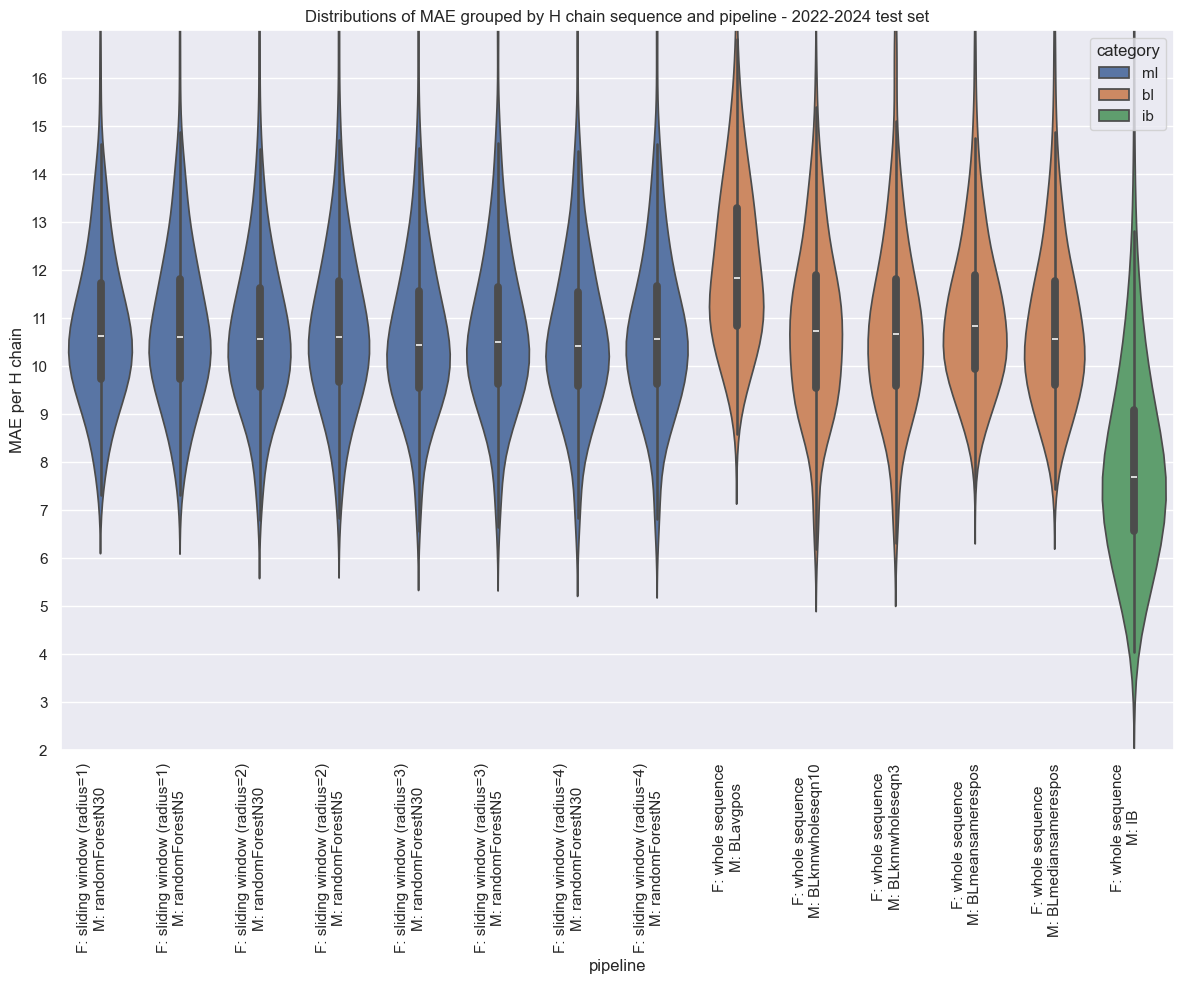

In [1148]:
# (2, 17) for test-new

plot, data = generate_dists_per_sample(data, (2, 17), '2022-2024', 
                          f'{TEST_PNG_DIR_PATH}/loss_sample_scenario_boxplot_test_new_234_{EXPERIMENT_SETTINGS}.png', 'violin', True)


saving to: ../../data/png/test_new_234/loss_sample_scenario_boxplot_test_all_H.png


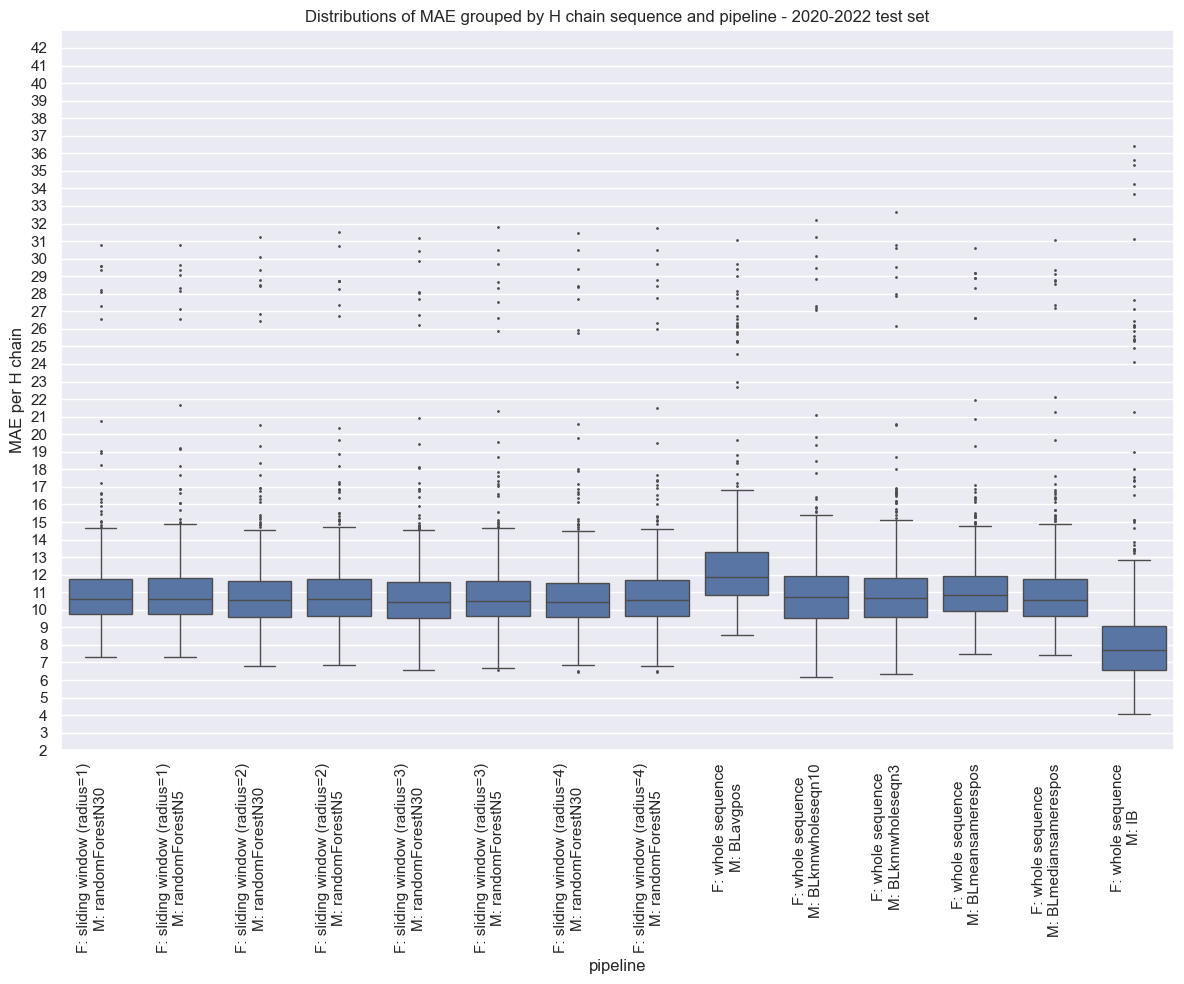

In [1149]:
plot, data = generate_dists_per_sample(data, (2, 43), '2020-2022', 
                          f'{TEST_PNG_DIR_PATH}/loss_sample_scenario_boxplot_test_{EXPERIMENT_SETTINGS}.png', 'box', False)

---

## Scores per position vs. SASA distributions

**Generate the dataframe for mean absolute errors in pipeline X position combinations:**

In [1150]:
loss_per_position_df = get_mae_per_position_df(results_df)
loss_per_position_df.head(n=2)
lppd = loss_per_position_test_df
lppd[lppd['position'].isin(['85B', '86'])]

mae_per_position_df.shape: (2460, 3)


pipeline position  abs_error
142      lco_cont_window_r1_all_H_randomForestN30      85B  11.070000
149      lco_cont_window_r1_all_H_randomForestN30       86   5.372473
306      lco_cont_window_r2_all_H_randomForestN30      85B  66.820000
313      lco_cont_window_r2_all_H_randomForestN30       86   5.251300
470       lco_cont_window_r2_all_H_randomForestN5      85B        NaN
477       lco_cont_window_r2_all_H_randomForestN5       86   5.366319
634      lco_cont_window_r3_all_H_randomForestN30      85B        NaN
641      lco_cont_window_r3_all_H_randomForestN30       86   5.377009
798       lco_cont_window_r3_all_H_randomForestN5      85B        NaN
805       lco_cont_window_r3_all_H_randomForestN5       86   5.448459
962      lco_cont_window_r4_all_H_randomForestN30      85B        NaN
969      lco_cont_window_r4_all_H_randomForestN30       86   5.257436
1126      lco_cont_window_r4_all_H_randomForestN5      85B        NaN
1133      lco_cont_window_r4_all_H_randomForestN5       86   5.535916
1290            lco_whole_sequence_all_H_BLavgpos      85B  68.330000
1297            lco_whole_sequence_all_H_BLavgpos       86  12.883150
1454    lco_whole_sequence_all_H_BLknnwholeseqn10      85B        NaN
1461    lco_whole_sequence_all_H_BLknnwholeseqn10       86   5.558909
1618     lco_whole_sequence_all_H_BLknnwholeseqn3      85B        NaN
1625     lco_whole_sequence_all_H_BLknnwholeseqn3       86   6.014991
1782    lco_whole_sequence_all_H_BLmeansamerespos      85B  66.600000
1789    lco_whole_sequence_all_H_BLmeansamerespos       86   5.267363
1946  lco_whole_sequence_all_H_BLmediansamerespos      85B  66.600000
1953  lco_whole_sequence_all_H_BLmediansamerespos       86   5.085348
2110              lco_whole_sequence_all_H_RANDOM      85B  41.658311
2117              lco_whole_sequence_all_H_RANDOM       86  27.483862

In [1151]:
def draw_mae_per_pipeline_plot(pipelines, loss_per_position_df, ax, testset, nth_label_only=5, col_start_i=-1, col_end_i=-1):
    # Y, 
    print('pipelines count:', len(pipelines))
    print(pipelines)
    print('---')
    
    cols = list(Y.columns)
    if col_start_i != -1 and col_end_i != -1:
        cols = cols[col_start_i:col_end_i]
    
    lppd = loss_per_position_df
    data = lppd[(lppd['pipeline'].isin(pipelines)) & (lppd['position'].isin(cols))]
    data = data.sort_values(by='position', key=lambda s: s.apply(u.anarci_column_sorter))
    plot = sns.lineplot(data=data, x='position', y='abs_error', hue='pipeline', 
                        sort=False, ax=ax, marker='o', style='pipeline')
    _=u.annotate_plot(plot, x_rotation = 90, 
                      title=u.wrap(f'Mean MAE per {p.FINAL_NUMBERING_SCHEME} position - {CHAINS} chains, {testset} test set'), 
                      xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                      ylabel='Mean MAE',
                      clean_ax_settings=dict(ax='x', nth_label_only=nth_label_only))
    u.show_cdr_regions(cols, plot, CHAINS, 
                        p.FINAL_NUMBERING_SCHEME, cdr_label_coord=data['abs_error'].max(), 
                       position_ax='x', text_offsets = [3, 2, 14])
    return plot, data

In [1152]:
loss_per_position_test_df = get_mae_per_position_df(
    pd.read_csv(f'{p.DATA_DIR}/csv/test_test/predictions_vs_sasa_test_all_H.csv', index_col=0))
sm_test_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test/scenario_mae_test_all_H.csv', index_col=0)

loss_per_position_testnew_df = get_mae_per_position_df(
    pd.read_csv(f'{p.DATA_DIR}/csv/test_test_new_234/predictions_vs_sasa_test_new_234_all_H.csv', index_col=0))
sm_testnew_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv', index_col=0)

mae_per_position_df.shape: (2132, 3)
mae_per_position_df.shape: (2460, 3)


pipelines count: 2
['lco_cont_window_r4_all_H_randomForestN30', 'lco_whole_sequence_all_H_BLmediansamerespos']
---
pipelines count: 3
['lco_cont_window_r4_all_H_randomForestN30', 'lco_whole_sequence_all_H_BLknnwholeseqn3', 'whole_sequence_all_H_IB']
---
storing to: ../../data/png/mae_per_position_per_scenario_both_testsets_all_H.png


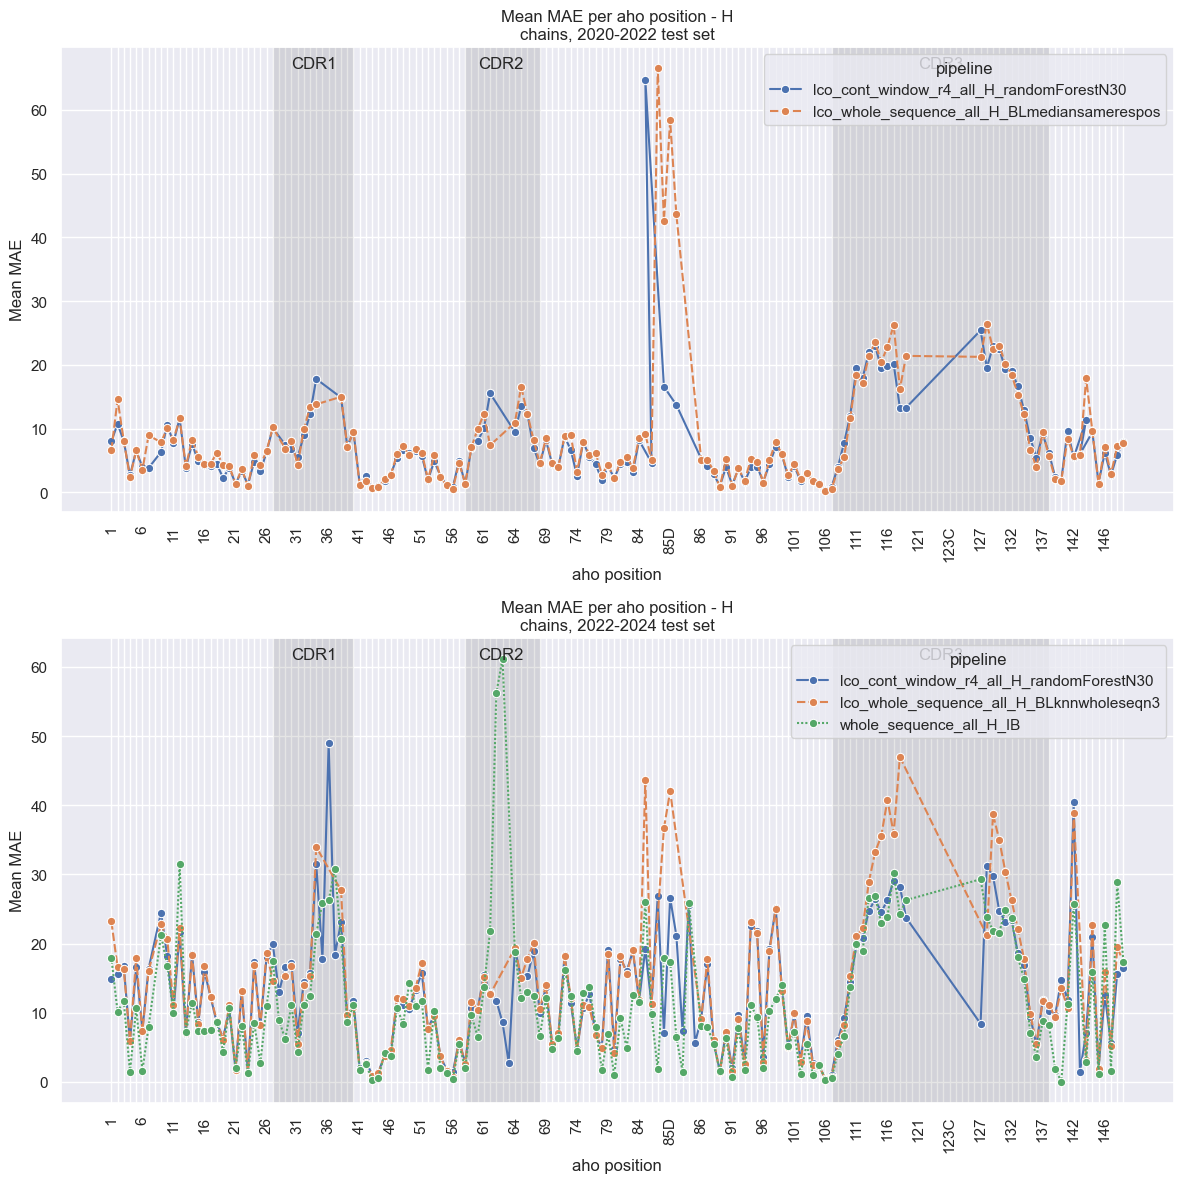

In [1153]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

pipelines_test = [
    get_s(get_best_pipeline_from_category(sm_test_df, 'ml')),
    get_s(get_best_pipeline_from_category(sm_test_df, 'bl'))
]
plot_test, data_test = draw_mae_per_pipeline_plot(pipelines_test, loss_per_position_test_df, ax1, '2020-2022')

pipelines_testnew = [
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'ml')),
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'bl')),
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'ib')),
]
plot_testnew, data_testnew = draw_mae_per_pipeline_plot(pipelines_testnew, loss_per_position_testnew_df, 
                                                        ax2, '2022-2024')

# Display the figure
plt.tight_layout()
print('storing to:', MAE_PER_POSITION_PER_PIPELINE_BOTH_DATASETS_PNG_PATH)
plt.savefig(MAE_PER_POSITION_PER_PIPELINE_BOTH_DATASETS_PNG_PATH)
plt.show()

In [1154]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(data_testnew)
    pass
#data_testnew = data_testnew.reset_index()
print(data_test['abs_error'].max(), data_test['abs_error'].argmax())
data_test.iloc[177]

66.6 177


pipeline     lco_whole_sequence_all_H_BLmediansamerespos
position                                             85B
abs_error                                           66.6
Name: 1946, dtype: object

In [1155]:
lppd = loss_per_position_test_df
lppd[lppd['position'].isin(['85B', '86'])]

pipeline position  abs_error
142      lco_cont_window_r1_all_H_randomForestN30      85B  11.070000
149      lco_cont_window_r1_all_H_randomForestN30       86   5.372473
306      lco_cont_window_r2_all_H_randomForestN30      85B  66.820000
313      lco_cont_window_r2_all_H_randomForestN30       86   5.251300
470       lco_cont_window_r2_all_H_randomForestN5      85B        NaN
477       lco_cont_window_r2_all_H_randomForestN5       86   5.366319
634      lco_cont_window_r3_all_H_randomForestN30      85B        NaN
641      lco_cont_window_r3_all_H_randomForestN30       86   5.377009
798       lco_cont_window_r3_all_H_randomForestN5      85B        NaN
805       lco_cont_window_r3_all_H_randomForestN5       86   5.448459
962      lco_cont_window_r4_all_H_randomForestN30      85B        NaN
969      lco_cont_window_r4_all_H_randomForestN30       86   5.257436
1126      lco_cont_window_r4_all_H_randomForestN5      85B        NaN
1133      lco_cont_window_r4_all_H_randomForestN5       86   5.535916
1290            lco_whole_sequence_all_H_BLavgpos      85B  68.330000
1297            lco_whole_sequence_all_H_BLavgpos       86  12.883150
1454    lco_whole_sequence_all_H_BLknnwholeseqn10      85B        NaN
1461    lco_whole_sequence_all_H_BLknnwholeseqn10       86   5.558909
1618     lco_whole_sequence_all_H_BLknnwholeseqn3      85B        NaN
1625     lco_whole_sequence_all_H_BLknnwholeseqn3       86   6.014991
1782    lco_whole_sequence_all_H_BLmeansamerespos      85B  66.600000
1789    lco_whole_sequence_all_H_BLmeansamerespos       86   5.267363
1946  lco_whole_sequence_all_H_BLmediansamerespos      85B  66.600000
1953  lco_whole_sequence_all_H_BLmediansamerespos       86   5.085348
2110              lco_whole_sequence_all_H_RANDOM      85B  66.775626
2117              lco_whole_sequence_all_H_RANDOM       86  28.179175

In [1156]:
SAME = 0.6

def m(a, b):
    return (not math.isnan(a)) and (math.isnan(b) or (a+SAME) <= b)

def s(a, b):
    return math.isnan(a) or math.isnan(b) or abs(a-b) <= SAME

def count_nans(a, b, c):
    count = 0
    for i in (a, b, c):
        if math.isnan(i):
            count += 1
    return count
    
def all_nans(a, b, c):
    return math.isnan(a) and math.isnan(b) and math.isnan(c)
    
def position_clf_testnew(row):
    flags = []
    ml, bl, ib = row['ml'], row['bl'], row['ib']
    #if np.std([ml, bl, ib]) < STD_LIMIT:
    if s(ml, bl) and s(ml, ib) and s(bl, ib) and count_nans(bl, ml, ib) < 2:
        flags.append('all equal')
    if m(ml, bl) and m(ml, ib):
        flags.append('ML best')
    if m(bl, ml) and m(bl, ib):
        flags.append('BL best')
    if m(ib, ml) and m(ib, bl):
        flags.append('IB best')
    if all_nans(ml, bl, ib):
        flags.append('no predictions')
    if m(ib, bl) and m(ml, bl) and not m(ib, ml) and not m(ml, ib) and count_nans(ml, bl, ib) == 0:
        flags.append('ML and IB equal, BL worst')   
    if m(ml, ib) and m(bl, ib) and not m(ml, bl) and not m(bl, ml) and count_nans(ml, bl, ib) == 0:
        flags.append('ML and BL equal, IB worst') 
    if m(ib, ml) and m(bl, ml) and not m(ib, bl) and not m(bl, ib) and count_nans(ml, bl, ib) == 0:
        flags.append('IB and BL equal, ML worst')     
    if not flags:
        flags.append('cascade')
    assert len(flags) == 1, (flags, ml, bl, ib)
    return flags[0]

def position_clf_test(row):
    flags = []
    ml, bl, ib = row['ml'], row['bl'], np.nan
    if s(ml, bl) and s(bl, ml) and count_nans(bl, ml, ib) == 1:
        flags.append('all equal')
    if m(ml, bl):
        flags.append('ML best')
    if m(bl, ml):
        flags.append('BL best') 
    if count_nans(bl, ml, ib) == 3:
        flags.append('no predictions')
    if not flags:
        flags.append('other')
    assert len(flags) == 1, (flags, ml, bl, ib)
    return flags[0]

def get_position_clfs(df, columns, clf_function):
    df_pivot = df.pivot(index='position', columns='pipeline', values='abs_error')#.reset_index()
    df_pivot.columns = columns
    df_pivot['category'] = df_pivot.apply(clf_function, axis=1)
    vcs = df_pivot['category'].value_counts()
    print(vcs)
    return df_pivot, vcs

In [1157]:
pivot_test, clf_test = get_position_clfs(data_test, ['ml', 'bl'], position_clf_test)
assert(clf_test.sum() == data_test['position'].nunique())

all equal         83
ML best           43
no predictions    22
BL best           16
Name: category, dtype: int64


In [1158]:
pivot_testnew, clf_testnew = get_position_clfs(data_testnew, ['ml', 'bl', 'ib'], position_clf_testnew)
assert(clf_testnew.sum() == data_testnew['position'].nunique())
pivot_testnew[pivot_testnew['category']=='other']

IB best                      89
ML best                      20
all equal                    19
no predictions               12
cascade                      10
ML and IB equal, BL worst     5
ML and BL equal, IB worst     4
BL best                       3
IB and BL equal, ML worst     2
Name: category, dtype: int64


Empty DataFrame
Columns: [ml, bl, ib, category]
Index: []

In [1159]:
data_testnew.groupby(['position', 'pipeline'])
df_pivot = data_testnew.pivot(index='position', columns='pipeline', values='abs_error')#.reset_index()
df_pivot.columns = ['ml', 'bl', 'ib']
df_pivot['category'] = df_pivot.apply(position_clf, axis=1)
print(df_pivot['category'].value_counts())

ib best     89
ml best     20
same        19
all nans    12
other       10
bl worst     5
ib worst     4
bl best      3
ml worst     2
Name: category, dtype: int64


In [1160]:
df_pivot[df_pivot['category'] == 'same'].head(n=3)

ml        bl        ib category
position                                       
100       4.999526  5.003709  5.177904     same
105       2.272432  2.339471  2.418430     same
106       0.412331  0.353975  0.328783     same

In [1161]:
df_pivot[df_pivot['category'] == 'other'].head(n=3)

ml         bl         ib category
position                                          
141       11.836913  10.740238  11.256193    other
39         9.190684   9.603808   8.621889    other
40        11.633682  10.826702  11.064966    other

In [1162]:
df_pivot[df_pivot['category'] == 'same'].head(n=3)

ml        bl        ib category
position                                       
100       4.999526  5.003709  5.177904     same
105       2.272432  2.339471  2.418430     same
106       0.412331  0.353975  0.328783     same

In [1163]:
# tabulka, kde mame pozicie s podobnymi vysledkami, a rozne typy 
# tabulka REGION, pipeline, priemerna MAE

----

## Prediction of methionin residues exposure >= 10%

In [1080]:
def get_acc_per_position_df(results_df : pd.DataFrame) -> pd.DataFrame:
    acc_per_position_df = results_df.groupby(['pipeline', 'position'])['is_correct_pred'].mean().to_frame().reset_index()
    print('acc_per_position_df.shape:', acc_per_position_df.shape)
    return acc_per_position_df 

def get_res_exposure(results_df: pd.DataFrame, aminoacid: str, threshold: float):
    SASA_THRESHOLD, AA = 10.0, 'M'
    mets_df = results_df[results_df['aa'] == AA].copy()
    #mets_df = mets_df[~(mets_df['sasa'].isna() | mets_df['prediction'].isna())]
    mets_df['true_exposed'] = mets_df['sasa'] > SASA_THRESHOLD
    mets_df['pred_exposed'] = mets_df['prediction'] > SASA_THRESHOLD
    mets_df['is_correct_pred'] =  mets_df['true_exposed'] == mets_df['pred_exposed']
    accuracy = mets_df['is_correct_pred'].mean()
    print(f'{accuracy*100}%')
    return mets_df

def draw_met_accuracy_per_pos_per_pipeline_plot(pipelines, loss_per_position_df, ax, testset, xticks,
                                                nth_label_only=5, col_start_i=-1, col_end_i=-1):
    cols = list(Y.columns)

    lppd = loss_per_position_df.copy()
    positions = list(lppd['position'].unique())
    data = lppd[(lppd['pipeline'].isin(pipelines)) & (lppd['position'].isin(cols))]
    for xtick in xticks:
        if xtick not in positions:
            for pipeline in pipelines:
                data.loc[-1] = [pipeline, xtick, np.nan]  # adding a row
                data.index = data.index + 1  # shifting index
                data = data.sort_index()  # sorting by index

    # add the missing values
    data = data.sort_values(by='position', key=lambda s: s.apply(u.anarci_column_sorter))
    plot = sns.lineplot(data=data, x='position', y='is_correct_pred', hue='pipeline', 
                        sort=False, ax=ax, marker='o', style='pipeline', alpha=0.6)
    plot.set_xticks(xticks)
    _=u.annotate_plot(plot, x_rotation = 90, 
                      title=u.wrap(f'mean accuracy for methionine >= 10% exposure prediction (binary classification task)  per {p.FINAL_NUMBERING_SCHEME} position - {CHAINS} chains, {testset} test set'), 
                      xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                      ylabel='mean accuracy per aho position',
                      clean_ax_settings=dict(ax='x', nth_label_only=nth_label_only)
    )
    u.show_cdr_regions(cols, plot, CHAINS, 
                        p.FINAL_NUMBERING_SCHEME, cdr_label_coord=data['is_correct_pred'].max(), 
                       position_ax='x', text_offsets = [3, 2, 14])
    return plot, data

In [1081]:
sm_test_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test/scenario_mae_test_all_H.csv', index_col=0)
results_test_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test/predictions_vs_sasa_test_all_H.csv', index_col=0).sort_values(
    by='position', key=lambda s: s.apply(u.anarci_column_sorter))
met_test_df = get_res_exposure(results_test_df, 'M', 10.0)
acc_per_position_test_df = get_acc_per_position_df(met_test_df)

sm_testnew_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test_new_234/scenario_mae_test_new_234_all_H.csv', index_col=0)
results_testnew_df = pd.read_csv(f'{p.DATA_DIR}/csv/test_test_new_234/predictions_vs_sasa_test_new_234_all_H.csv', index_col=0).sort_values(
    by='position', key=lambda s: s.apply(u.anarci_column_sorter))
met_testnew_df = get_res_exposure(results_testnew_df, 'M', 10.0)  
acc_per_position_testnew_df = get_acc_per_position_df(met_testnew_df)

90.567222095412%
acc_per_position_df.shape: (767, 3)
91.18906990329072%
acc_per_position_df.shape: (1035, 3)


In [1117]:
met_testnew_df['pipeline'].unique()

array(['lco_cont_window_r3_all_H_randomForestN30',
       'lco_cont_window_r2_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLknnwholeseqn10',
       'lco_cont_window_r4_all_H_randomForestN5',
       'lco_whole_sequence_all_H_BLmeansamerespos',
       'lco_cont_window_r2_all_H_randomForestN5',
       'lco_whole_sequence_all_H_BLmediansamerespos',
       'whole_sequence_all_H_IB',
       'lco_cont_window_r1_all_H_randomForestN5',
       'lco_cont_window_r4_all_H_randomForestN30',
       'lco_cont_window_r1_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLavgpos',
       'lco_cont_window_r3_all_H_randomForestN5',
       'lco_whole_sequence_all_H_BLknnwholeseqn3',
       'lco_whole_sequence_all_H_RANDOM'], dtype=object)

In [1115]:
def get_mean_per_pip(data, pip):
    data_pip = data[data['pipeline']==pip]
    return data_pip['is_correct_pred'].mean()*100

In [1120]:
(get_mean_per_pip(met_test_df, 'lco_cont_window_r4_all_H_randomForestN30'),
get_mean_per_pip(met_test_df, 'lco_whole_sequence_all_H_BLmediansamerespos'),
get_mean_per_pip(met_testnew_df, 'lco_cont_window_r4_all_H_randomForestN30'),
get_mean_per_pip(met_testnew_df, 'lco_whole_sequence_all_H_BLknnwholeseqn3'),
get_mean_per_pip(met_testnew_df, 'whole_sequence_all_H_IB'))


(95.77151335311572,
 96.36498516320475,
 95.08754863813229,
 95.18482490272373,
 96.84729064039409)

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_67996/2853355537.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[-1] = [pipeline, xtick, np.nan]  # adding a row
/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_67996/2853355537.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[-1] = [pipeline, xtick, np.nan]  # adding a row


storing to: ../../data/png/mean_meth10_accuracy_per_scenario_both_testsets_all_H.png


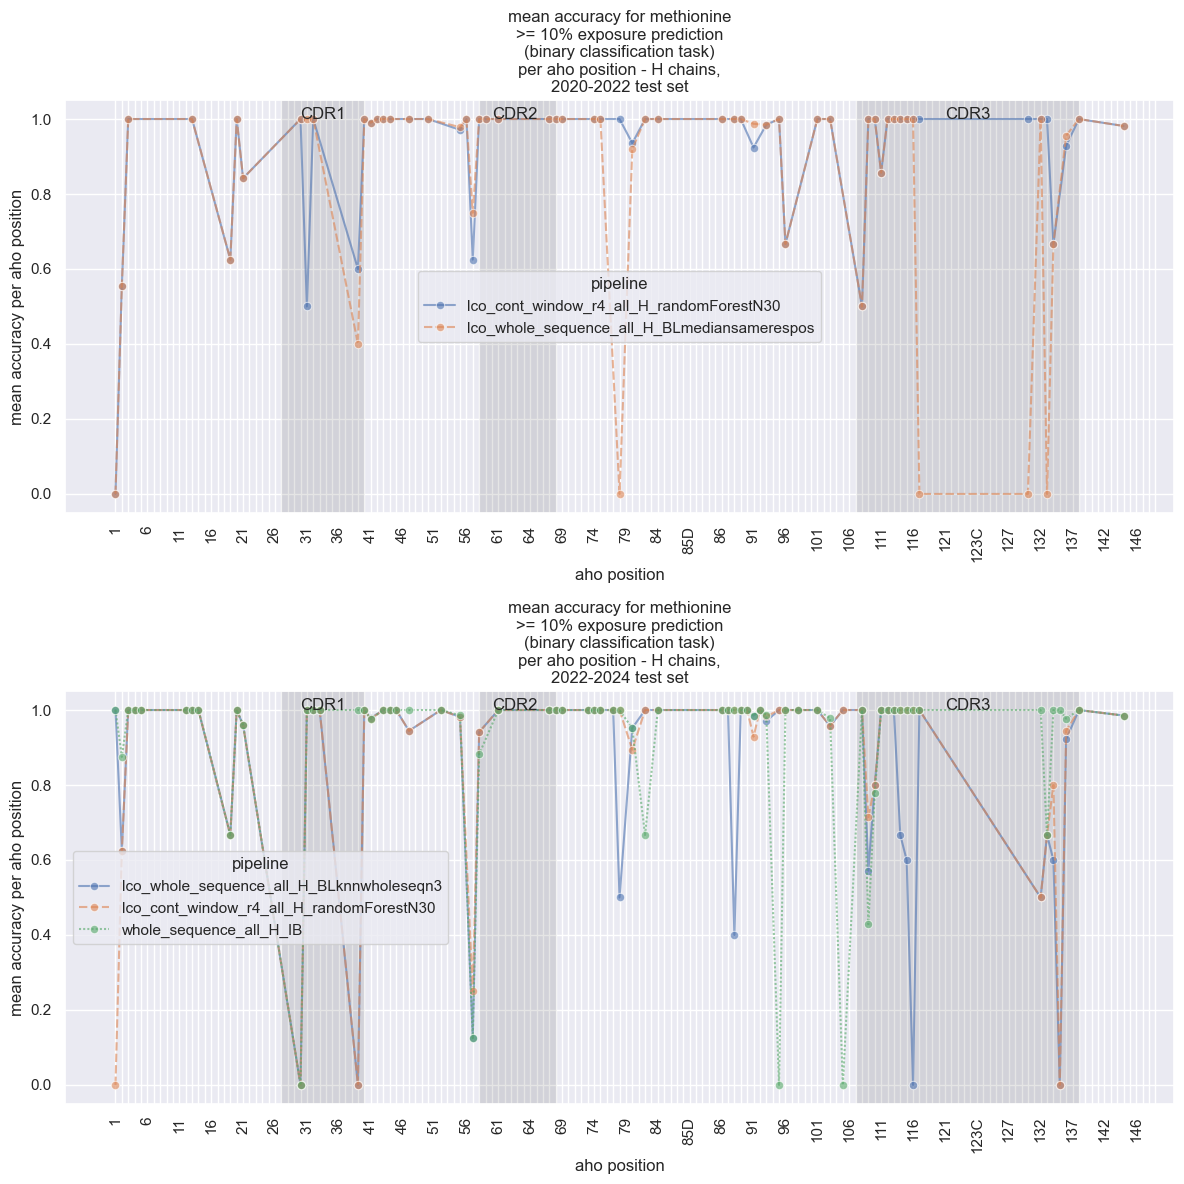

In [845]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

pipelines_test = [
    get_s(get_best_pipeline_from_category(sm_test_df, 'ml')),
    get_s(get_best_pipeline_from_category(sm_test_df, 'bl'))
]
xticks_test = sorted(results_test_df['position'].unique(), key=u.anarci_column_sorter)
plot_test, data_test = draw_met_accuracy_per_pos_per_pipeline_plot(pipelines_test, acc_per_position_test_df, ax1, '2020-2022',
                                                                  xticks=xticks_test)

pipelines_testnew = [
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'ml')),
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'bl')),
    get_s(get_best_pipeline_from_category(sm_testnew_df, 'ib')),
]
xticks_testnew = sorted(results_testnew_df['position'].unique(), key=u.anarci_column_sorter)
plot_testnew, data_testnew = draw_met_accuracy_per_pos_per_pipeline_plot(pipelines_testnew, acc_per_position_testnew_df, 
                                                        ax2, '2022-2024', xticks=xticks_testnew)

# Display the figure
plt.tight_layout()
print('storing to:', MEAN_METH10_ACCURACY_PER_PIPELINE_BOTH_DATASETS_PNG_PATH)
plt.savefig(MEAN_METH10_ACCURACY_PER_PIPELINE_BOTH_DATASETS_PNG_PATH)
plt.show()

In [1082]:
data_testnew['position'].nunique()

164

In [1088]:
def get_roc_curve_turn_point(fpr, tpr):
    # Compute AUC
    roc_auc = metrics.auc(fpr, tpr)
    
    # Find the turning point (the point with the maximum curvature)
    # A simple method is to take the point with the maximum distance to the line y=x (which is a rough approximation)
    distances = (tpr - fpr) / np.sqrt(2)
    turning_point_idx = np.argmax(distances)
    turning_point_fpr = fpr[turning_point_idx]
    turning_point_tpr = tpr[turning_point_idx]
    return (turning_point_fpr, turning_point_tpr)

In [1096]:
data_testnew['pipeline'].unique()

array(['lco_cont_window_r4_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLknnwholeseqn3',
       'whole_sequence_all_H_IB'], dtype=object)

In [1100]:
def g(testset, pip):
    if testset == 'old':
        df = met_test_df
    elif testset == 'new':
        df = met_testnew_df
    else:
        raise ValueError('bad testset')

    if pip == 'ml':
        pipeline = 'lco_cont_window_r4_all_H_randomForestN30'
    elif pip == 'bl':
        pipeline = 'lco_whole_sequence_all_H_BLknnwholeseqn3'
    elif pip == 'ib':
        pipeline = 'whole_sequence_all_H_IB'
    else: 
        raise ValueError('bad pipeline')

    df = df.copy()
    df = df[df['pipeline'] == pipeline]
    display(df.head(n=1))
    return df['true_exposed'], df['pred_exposed']

In [1105]:
g('new', 'ib')

pipeline sequence_id position aa  sasa  prediction  \
1020118  whole_sequence_all_H_IB      8IUZ:H        1  M  95.5        95.1   

         error  abs_error  true_exposed  pred_exposed  is_correct_pred  
1020118   -0.4        0.4          True          True             True

(1020118    True
 1020117    True
 1020616    True
 1020370    True
 1020525    True
            ... 
 1158982    True
 1159119    True
 1159169    True
 1159135    True
 1159139    True
 Name: true_exposed, Length: 2030, dtype: bool,
 1020118    True
 1020117    True
 1020616    True
 1020370    True
 1020525    True
            ... 
 1158982    True
 1159119    True
 1159169    True
 1159135    True
 1159139    True
 Name: pred_exposed, Length: 2030, dtype: bool)

pipeline sequence_id position aa  \
645192  lco_cont_window_r4_all_H_randomForestN30      6OSV:H        1  M   

        sasa  prediction  error  abs_error  true_exposed  pred_exposed  \
645192  96.6         NaN    NaN        NaN          True         False   

        is_correct_pred  
645192            False

tp_test: (0.024612579762989972, 0.8804780876494024)
tp_testnew: (0.0770330859616574, 0.8539053014973695)


pipeline sequence_id position aa  \
645192  lco_cont_window_r4_all_H_randomForestN30      6OSV:H        1  M   

        sasa  prediction  error  abs_error  true_exposed  pred_exposed  \
645192  96.6         NaN    NaN        NaN          True         False   

        is_correct_pred  
645192            False

pipeline sequence_id position aa  sasa  \
92184  lco_whole_sequence_all_H_BLknnwholeseqn3      6OSV:H        1  M  96.6   

       prediction  error  abs_error  true_exposed  pred_exposed  \
92184       66.33 -30.27      30.27          True          True   

       is_correct_pred  
92184             True

pipeline sequence_id position aa  \
1309912  lco_cont_window_r4_all_H_randomForestN30      8IUZ:H        1  M   

         sasa  prediction  error  abs_error  true_exposed  pred_exposed  \
1309912  95.5         NaN    NaN        NaN          True         False   

         is_correct_pred  
1309912            False

pipeline sequence_id position aa  \
146332  lco_whole_sequence_all_H_BLknnwholeseqn3      8IUZ:H        1  M   

        sasa  prediction  error  abs_error  true_exposed  pred_exposed  \
146332  95.5       95.07  -0.43       0.43          True          True   

        is_correct_pred  
146332             True

pipeline sequence_id position aa  sasa  prediction  \
1020118  whole_sequence_all_H_IB      8IUZ:H        1  M  95.5        95.1   

         error  abs_error  true_exposed  pred_exposed  is_correct_pred  
1020118   -0.4        0.4          True          True             True

saving to: ../../data/png/test/methionine_residue_is_exposed_prediction_roc_test_all_H.png


<Figure size 600x400 with 0 Axes>

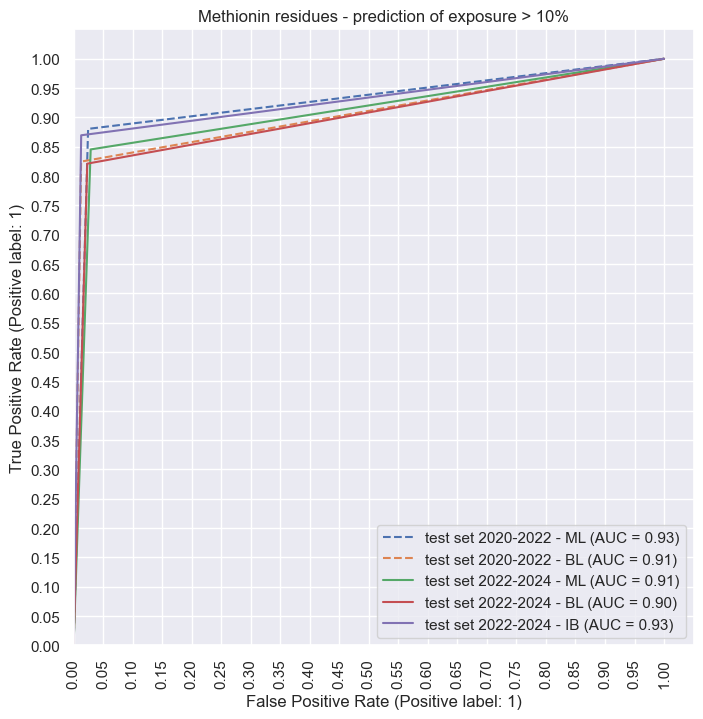

In [1108]:
#plt.figure(figsize=(4,2))
plt.rcParams["figure.figsize"] = (8,8)

fpr_test, tpr_test, thresholds = metrics.roc_curve(*g('old', 'ml'))
fpr_testnew, tpr_testnew, thresholds = metrics.roc_curve(met_testnew_df['true_exposed'], met_testnew_df['pred_exposed'])
tp_test, tp_testnew = get_roc_curve_turn_point(fpr_test, tpr_test), get_roc_curve_turn_point(fpr_testnew, tpr_testnew)
print('tp_test:', tp_test)
print('tp_testnew:', tp_testnew)

plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()

roc_display = metrics.RocCurveDisplay.from_predictions(*g('old', 'ml'), ax = ax, name='test set 2020-2022 - ML', linestyle='--')
metrics.RocCurveDisplay.from_predictions(*g('old', 'bl'), ax = ax, name='test set 2020-2022 - BL', linestyle='--')
metrics.RocCurveDisplay.from_predictions(*g('new', 'ml'), ax = ax, name='test set 2022-2024 - ML', linestyle='-')
metrics.RocCurveDisplay.from_predictions(*g('new', 'bl'), ax = ax, name='test set 2022-2024 - BL', linestyle='-')
metrics.RocCurveDisplay.from_predictions(*g('new', 'ib'), ax = ax, name='test set 2022-2024 - IB', linestyle='-')
#roc_display_new = metrics.RocCurveDisplay.from_predictions(met_testnew_df['true_exposed'], met_testnew_df['pred_exposed'],
#                                                          ax = ax, name='test set 2022-2024')


axes = ax
axes.set_title('Methionin residues - prediction of exposure > 10%')

# Mark the turning point
#plt.plot(*tp_test, 'bo')
#plt.plot(*tp_testnew, 'ro')

# Draw lines from the turning point to the x and y axes
# plt.plot([turning_point_fpr, turning_point_fpr], [0, turning_point_tpr], 'r--')
# plt.plot([0, turning_point_fpr], [turning_point_tpr, turning_point_tpr], 'r--')

plt.xlim(0, np.max(fpr) + 0.05)
plt.ylim(0, np.max(tpr) + 0.05)

NUMBER_OF_TICKS = 21
y_ticks, x_ticks = np.linspace(0, 1, NUMBER_OF_TICKS), np.linspace(0, 1, NUMBER_OF_TICKS)
_=plt.yticks(y_ticks, [f'{tick:.2f}' for tick in y_ticks])
_=plt.xticks(y_ticks, [f'{tick:.2f}' for tick in x_ticks])
plt.xticks(rotation=90)

# Add red labels at the intersection points with x and y axes
# plt.text(turning_point_fpr, 0, f'x = {turning_point_fpr:.2f}', color='red', verticalalignment='top', horizontalalignment='right')
# plt.text(0, turning_point_tpr, f'y = {turning_point_tpr:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

print('saving to:', METHIONINE_ROC_CURVE_PNG_PATH)
axes.figure.savefig(METHIONINE_ROC_CURVE_PNG_PATH)

In [110]:
l = loss_per_position_df
start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
start, end

(116, 151)

In [111]:
cols = list(Y.columns)[start:end]
print(cols)

['107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '123A', '123B', '123C', '123D', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137']


In [112]:
lcdr3 = l[ (l['position'].isin(cols))].copy()
lcdr3

scenario position  abs_error
9     lco_cont_window_r2_all_H_randomForestN5      107  32.873446
10    lco_cont_window_r2_all_H_randomForestN5      108  26.346926
11    lco_cont_window_r2_all_H_randomForestN5      109  25.801903
13    lco_cont_window_r2_all_H_randomForestN5      110  23.049365
14    lco_cont_window_r2_all_H_randomForestN5      111  31.720183
...                                       ...      ...        ...
1190          lco_whole_sequence_all_H_RANDOM      133  38.360646
1191          lco_whole_sequence_all_H_RANDOM      134  39.106725
1192          lco_whole_sequence_all_H_RANDOM      135  37.452495
1193          lco_whole_sequence_all_H_RANDOM      136  38.634324
1194          lco_whole_sequence_all_H_RANDOM      137  36.076571

[280 rows x 3 columns]

In [139]:
c = 'CDR3 mean absolute error'
A = lcdr3.groupby('pipeline')[c].mean().to_frame(name=c).sort_values(by=c)
A.insert(0, 'model', A['pipeline'].map(lambda s: s.split('_')[-1]))
A.insert(1, 'features', A['pipeline'].map(lambda s: '_'.join(s.split('_')[:-1])))
A = A.drop(columns='pipeline').reset_index()
A

KeyError: 'Column not found: CDR3 mean absolute error'

In [102]:
loss_per_position_df['abs_error'].mean()

31.397718868338067

**Let us check how many sequences has some SASA set at any given position, so we can sanity-check manually by comparing with sasa-distributions generated below (plots in the right column):**

In [103]:
print(dict(sasa_df.groupby('position')['sasa'].count()))

{'1': 6399, '10': 7983, '100': 7992, '101': 7992, '102': 7992, '103': 7992, '104': 7992, '105': 7992, '106': 7992, '107': 7992, '108': 7992, '109': 7992, '11': 7974, '110': 7938, '111': 7848, '112': 7407, '113': 6210, '114': 4536, '115': 2934, '116': 2043, '117': 1242, '118': 495, '119': 54, '12': 7983, '120': 0, '121': 0, '122': 0, '123': 0, '124': 0, '125': 0, '126': 0, '127': 36, '128': 171, '129': 801, '13': 7992, '130': 1539, '131': 2295, '132': 3609, '133': 5031, '134': 6696, '135': 7200, '136': 6858, '137': 6597, '138': 6354, '139': 6102, '14': 7992, '140': 5958, '141': 5787, '142': 5787, '143': 5778, '144': 5769, '145': 5769, '146': 5769, '147': 5769, '148': 5769, '149': 5769, '15': 7983, '16': 7857, '17': 7983, '18': 7983, '19': 7983, '2': 7722, '20': 7983, '21': 7992, '22': 7992, '23': 7992, '24': 7992, '25': 7992, '26': 7992, '27': 7830, '28': 27, '29': 7992, '3': 7911, '30': 7992, '31': 7992, '32': 7992, '33': 7956, '34': 459, '35': 54, '36': 27, '36A': 27, '36B': 27, '36C'

In [104]:
lppd = loss_per_position_df
lppd[ (lppd['pipeline'].str.contains('ib_preds')) & (lppd['abs_error'] > 100) ]

Empty DataFrame
Columns: [scenario, position, abs_error]
Index: []

**Generate plots and save to the PNG files:**

  0%|          | 0/15 [00:00<?, ?it/s]

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r1_all_H_randomForestN30_boxplot_all_H.png


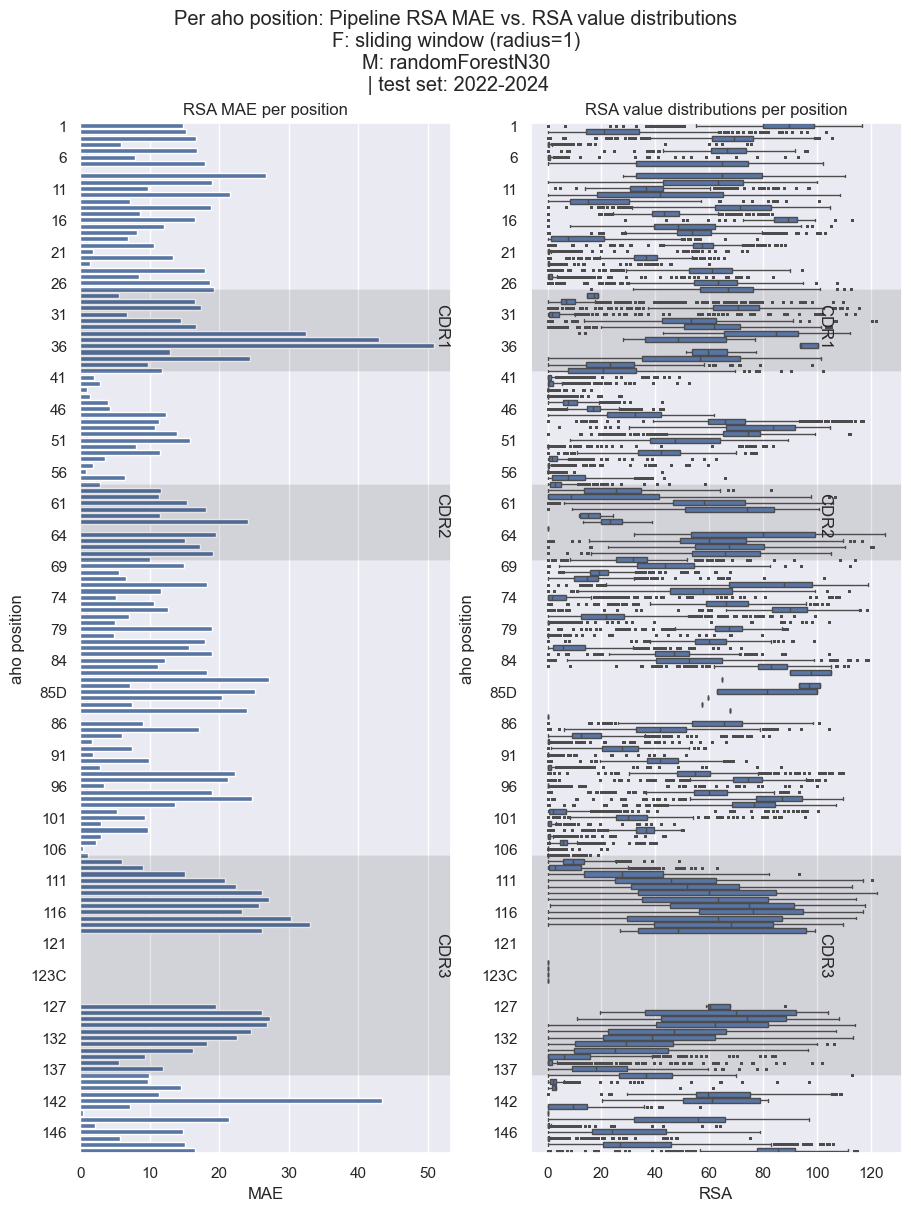

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r1_all_H_randomForestN5_boxplot_all_H.png


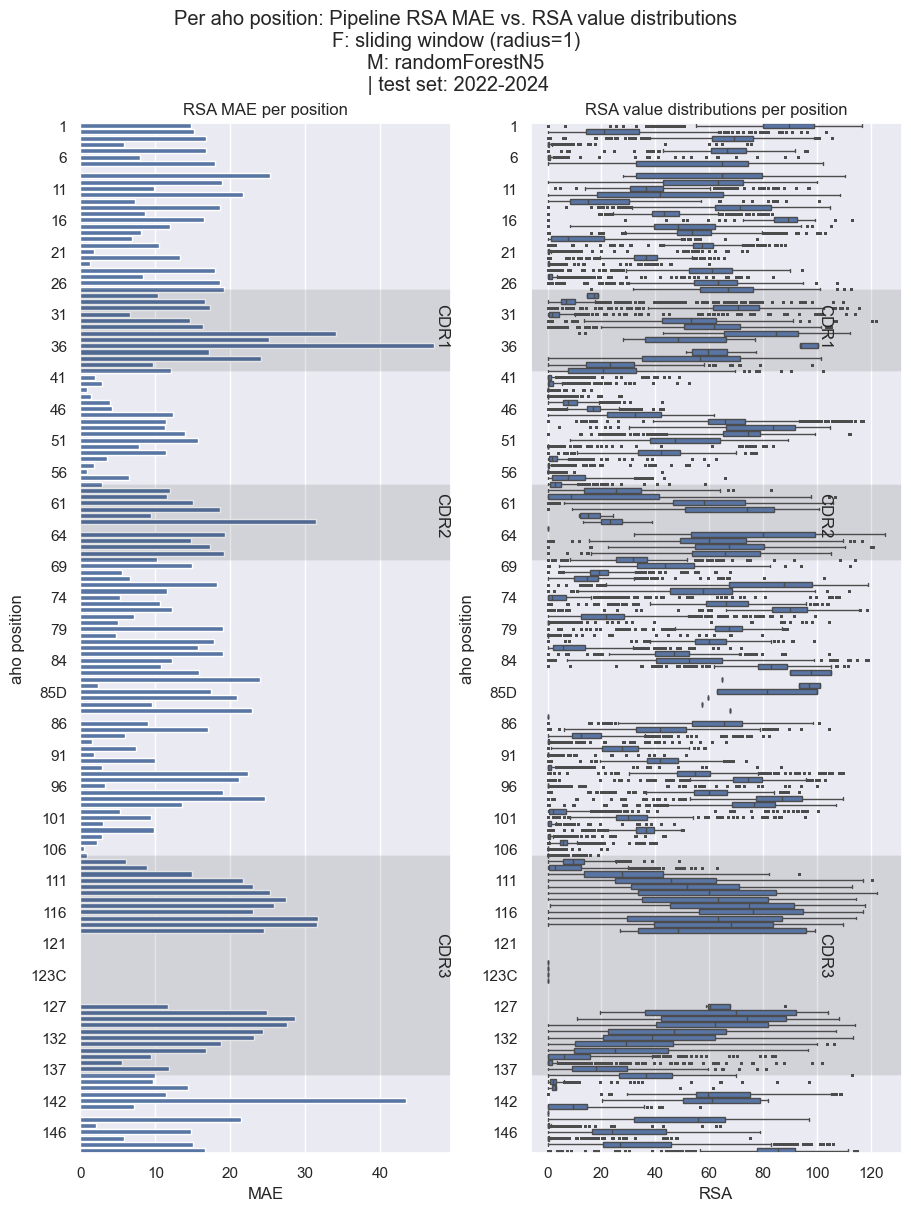

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r2_all_H_randomForestN30_boxplot_all_H.png


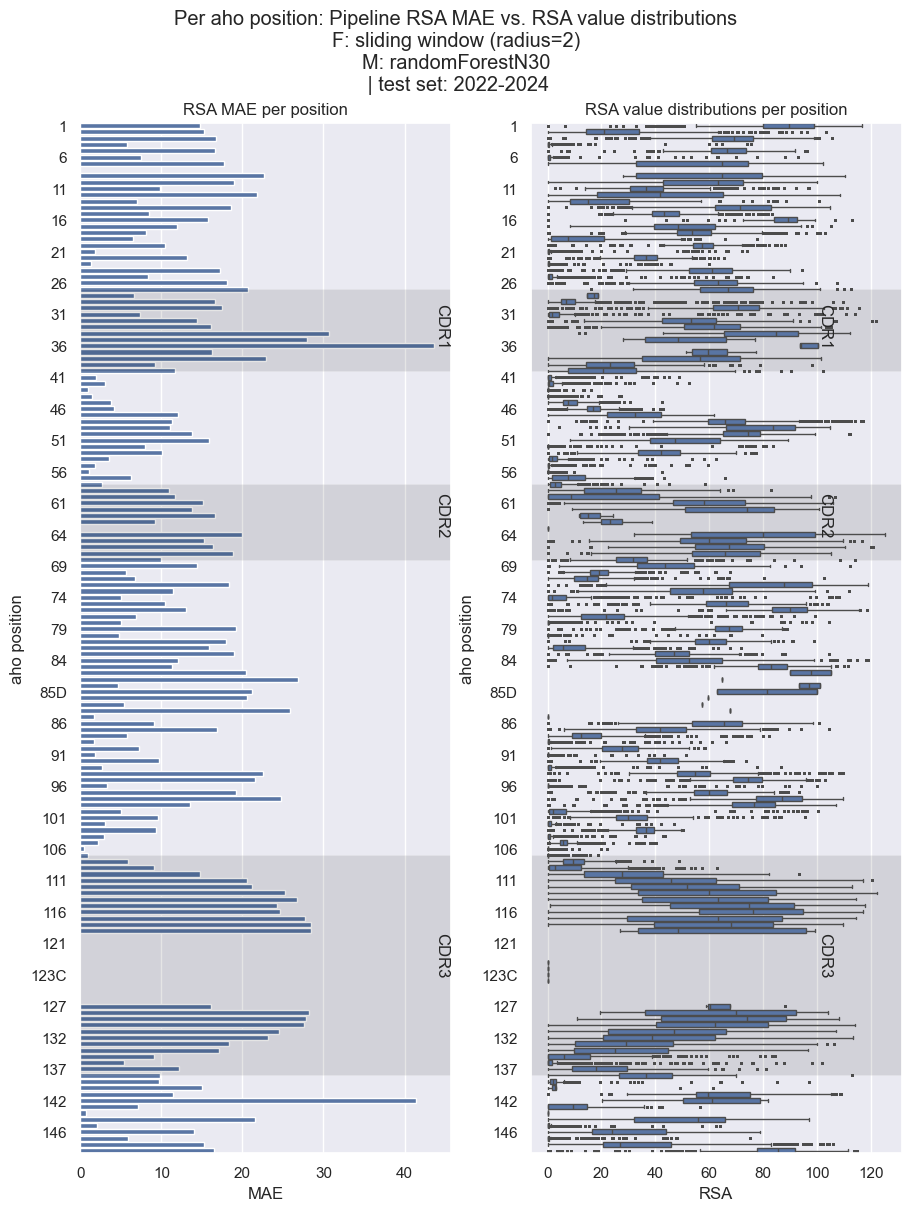

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r2_all_H_randomForestN5_boxplot_all_H.png


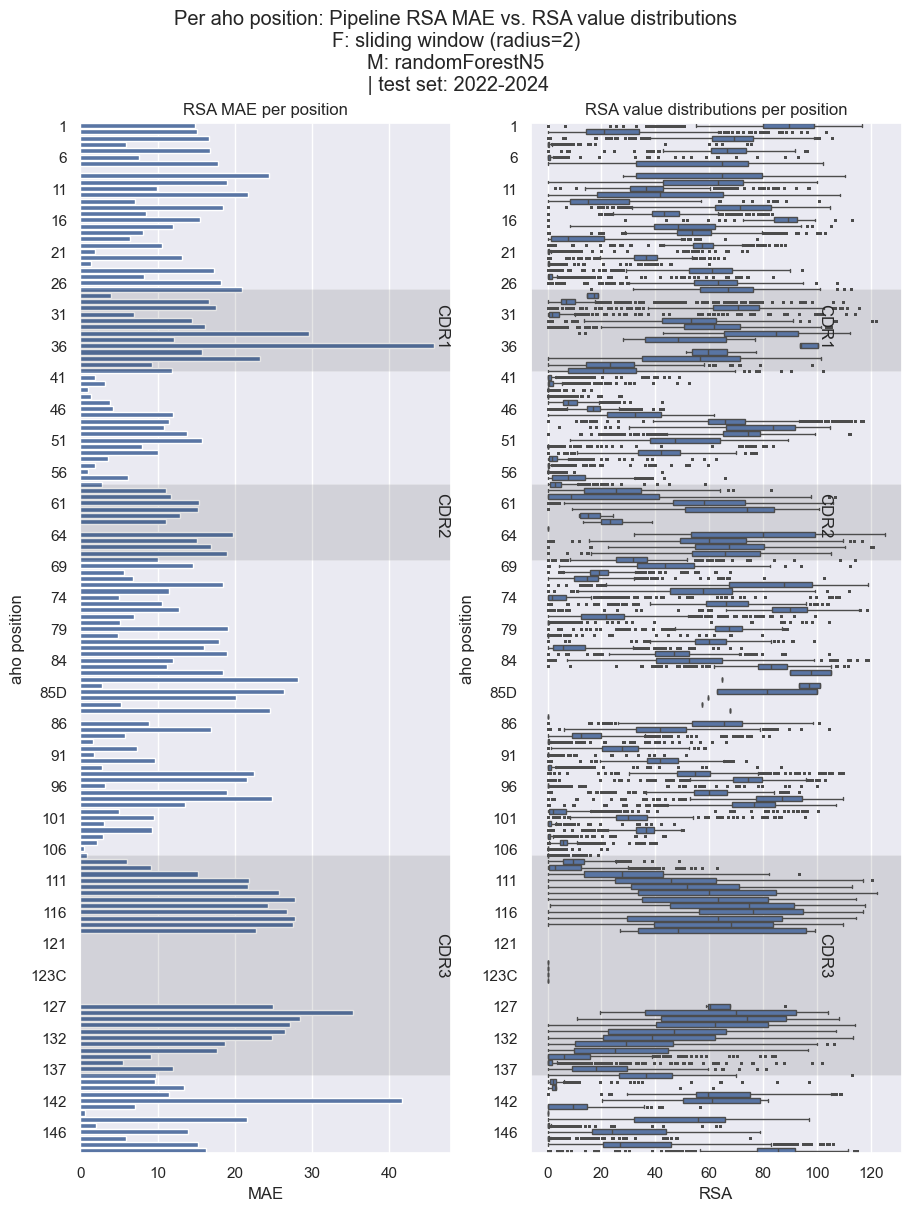

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r3_all_H_randomForestN30_boxplot_all_H.png


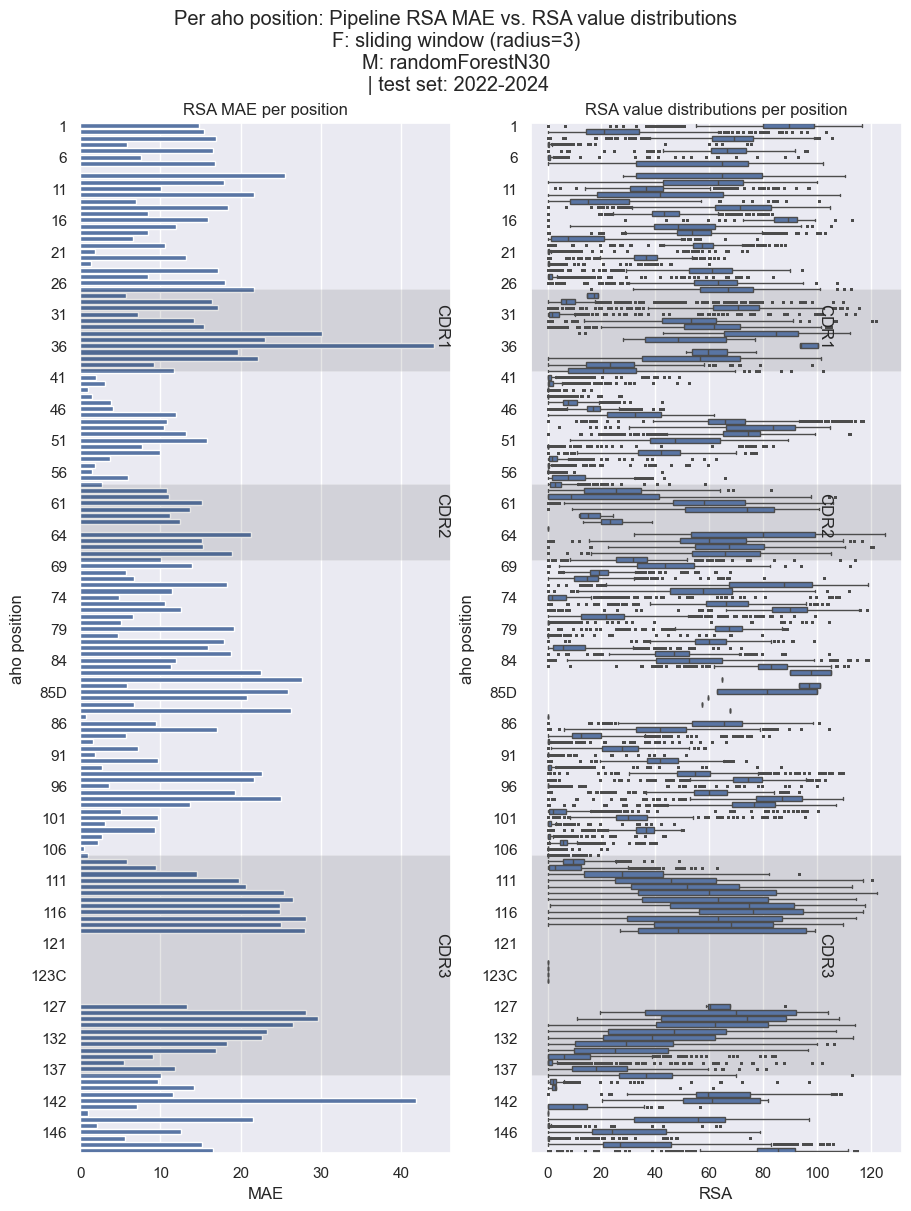

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r3_all_H_randomForestN5_boxplot_all_H.png


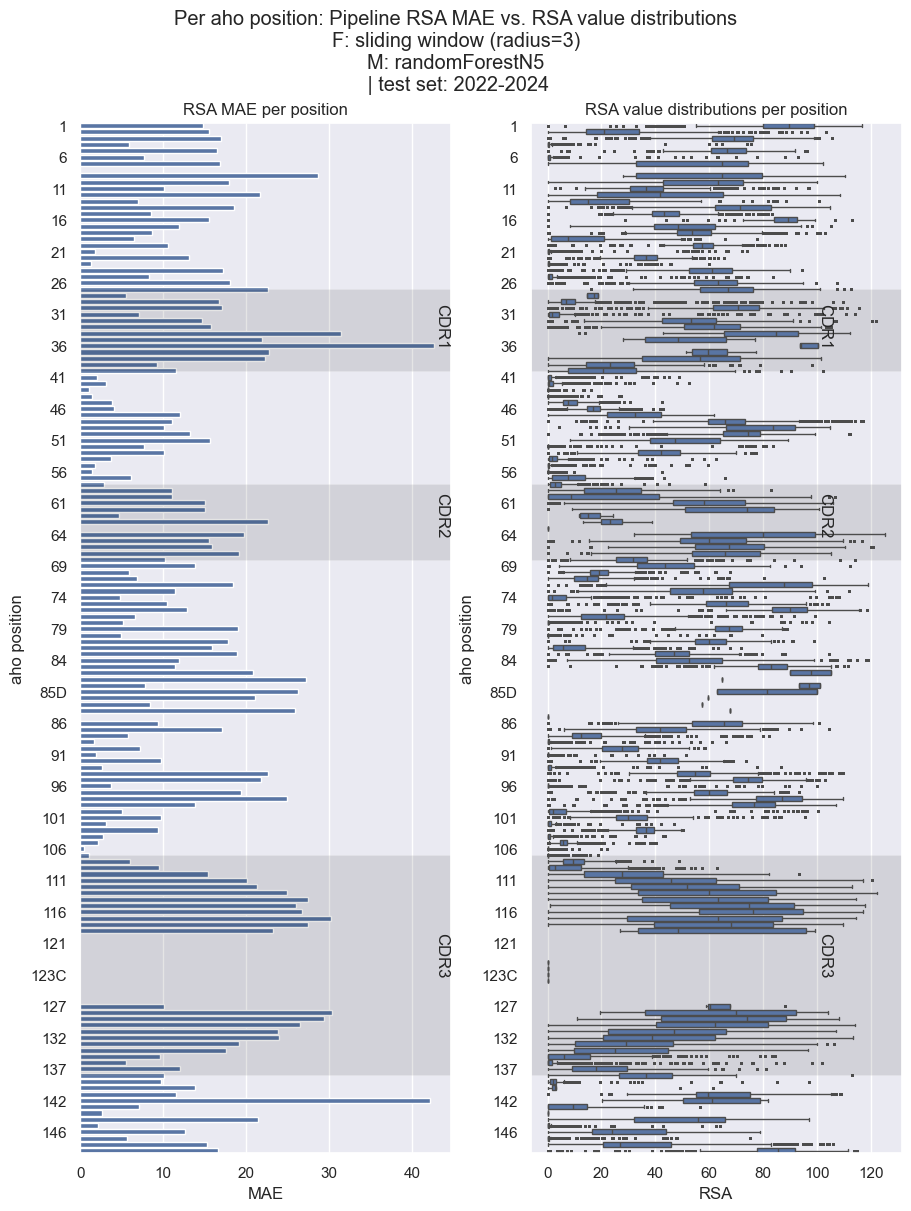

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r4_all_H_randomForestN30_boxplot_all_H.png


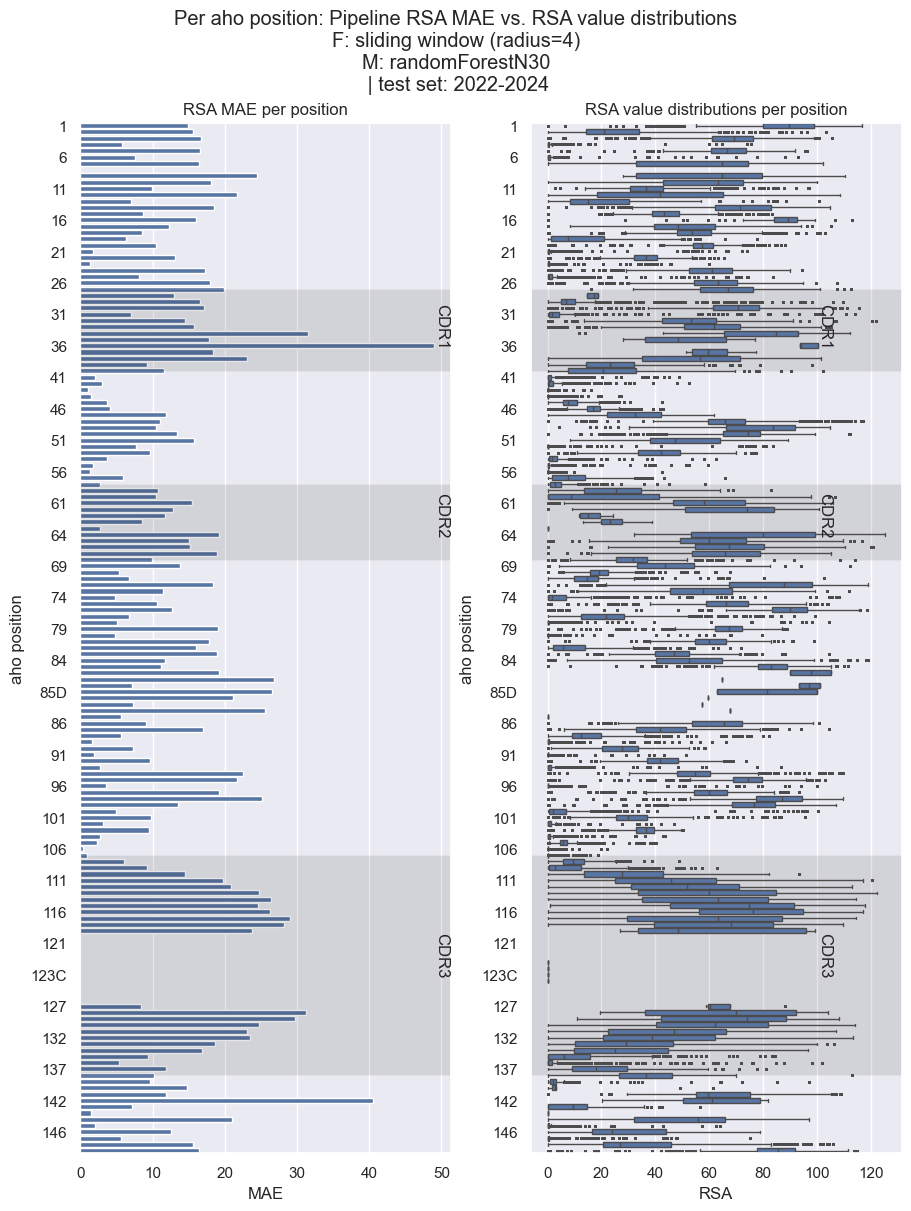

saving to: ../../data/png/test_new_234/loss_position_lco_cont_window_r4_all_H_randomForestN5_boxplot_all_H.png


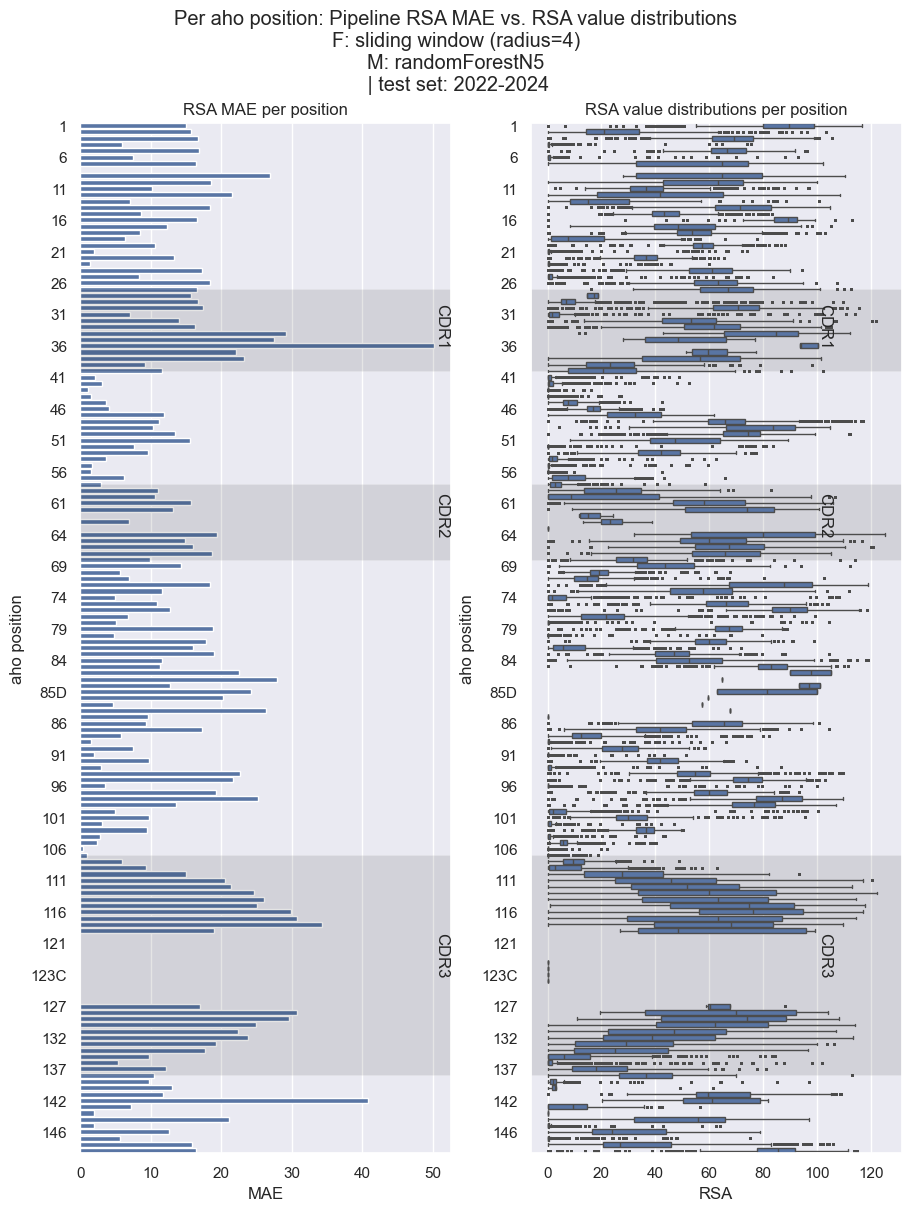

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_BLavgpos_boxplot_all_H.png


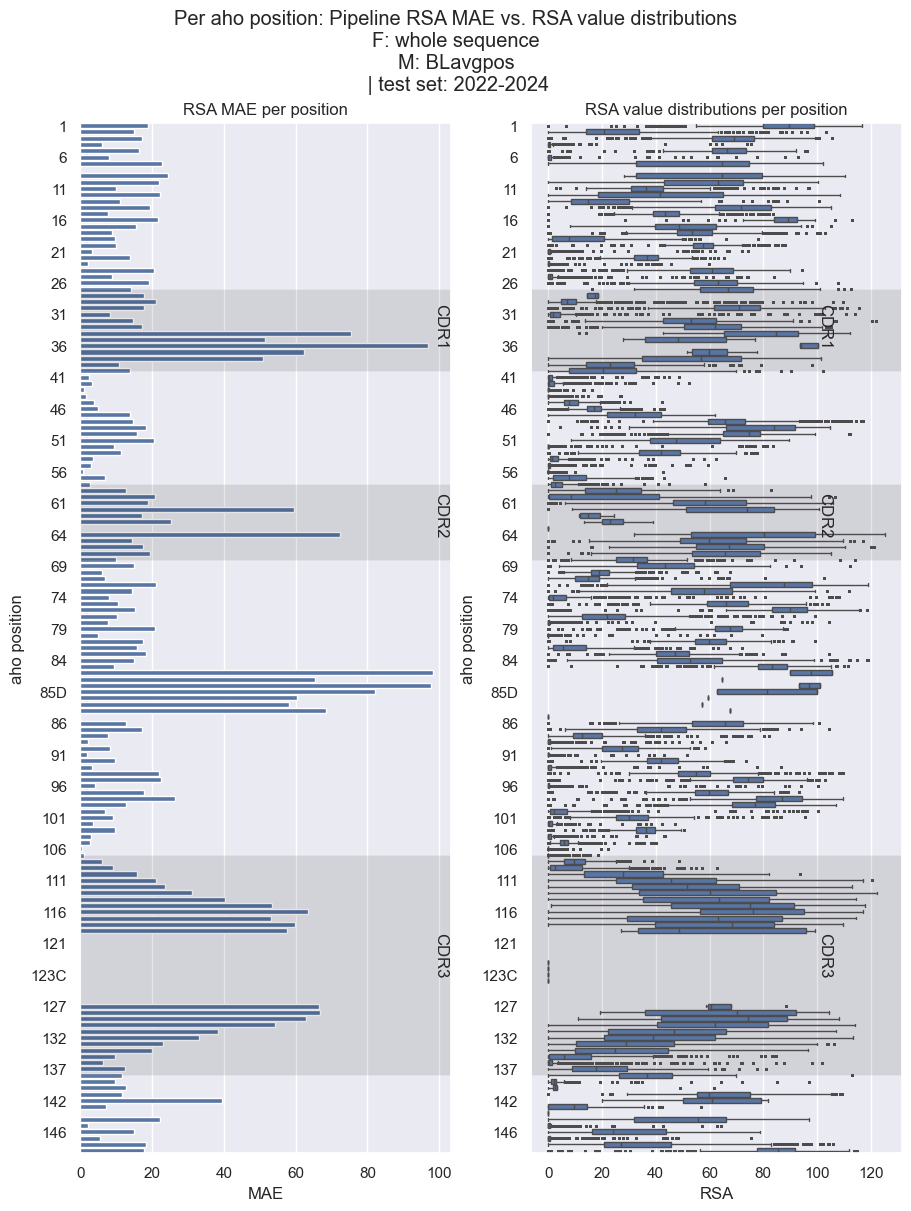

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_BLknnwholeseqn10_boxplot_all_H.png


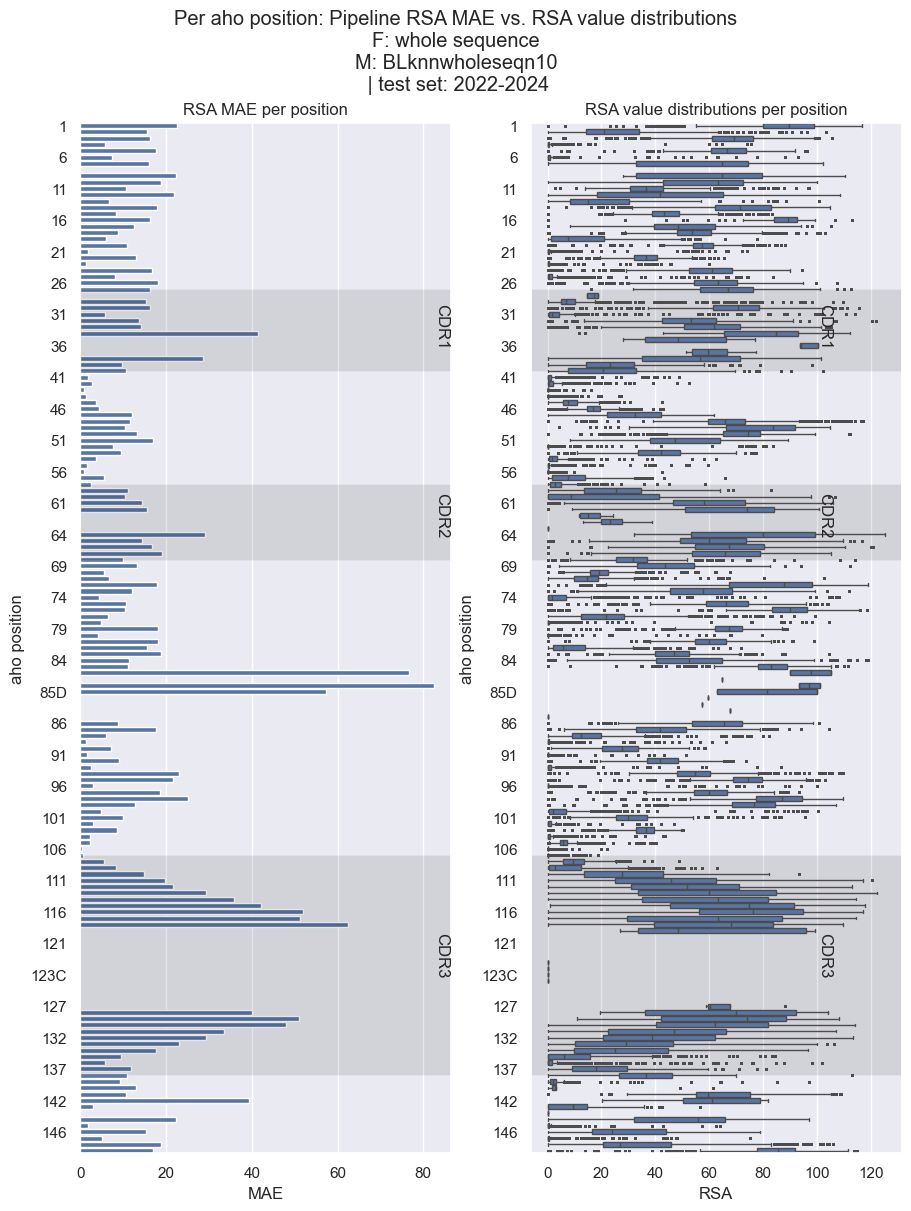

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_BLknnwholeseqn3_boxplot_all_H.png


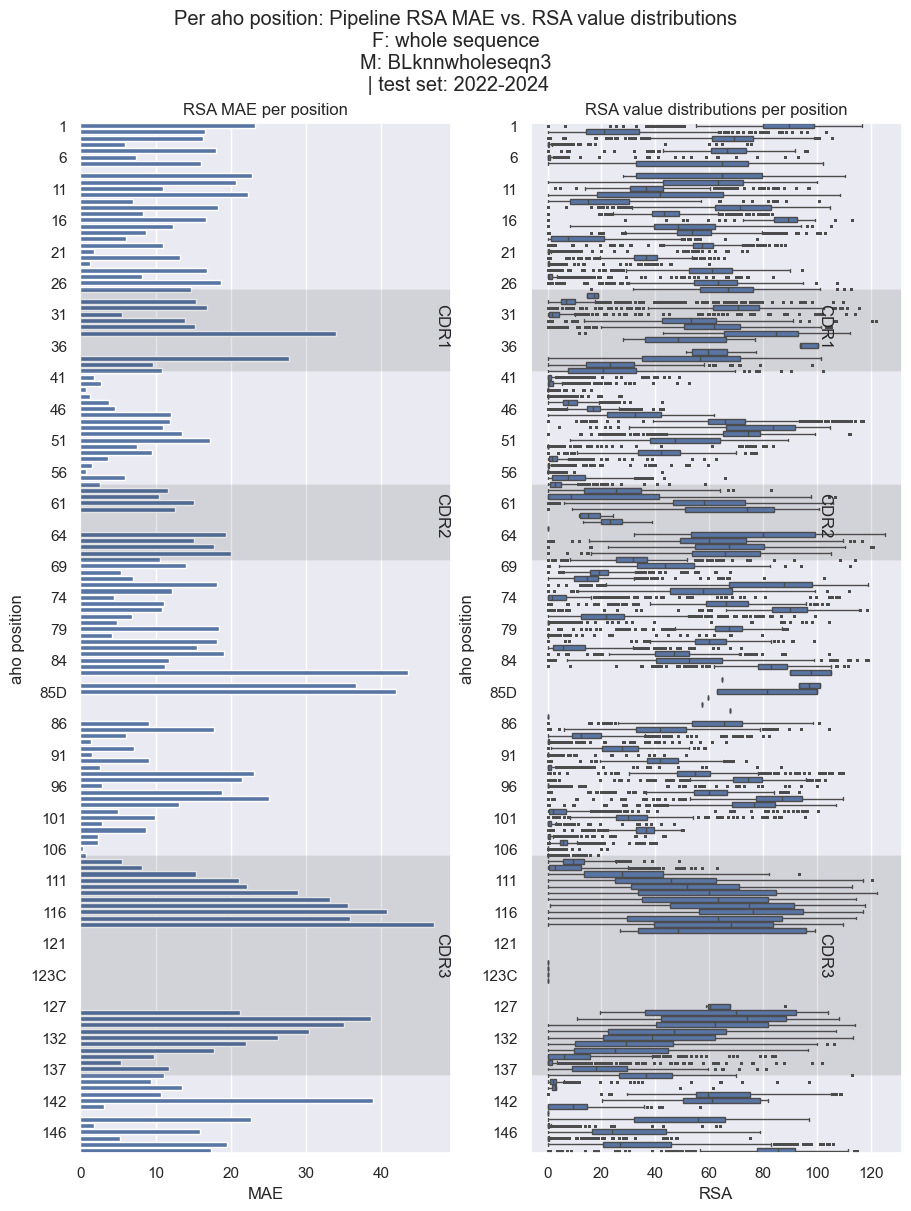

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_BLmeansamerespos_boxplot_all_H.png


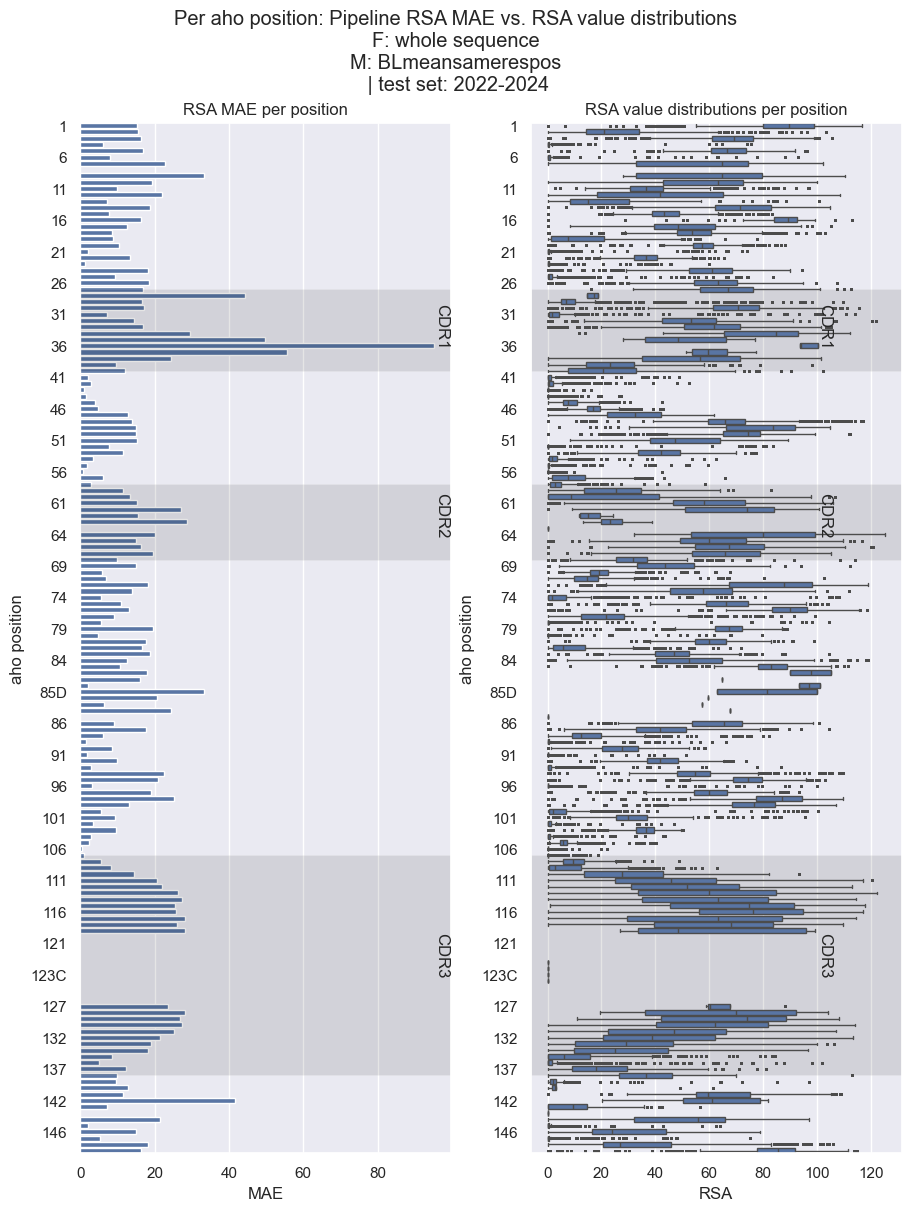

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_BLmediansamerespos_boxplot_all_H.png


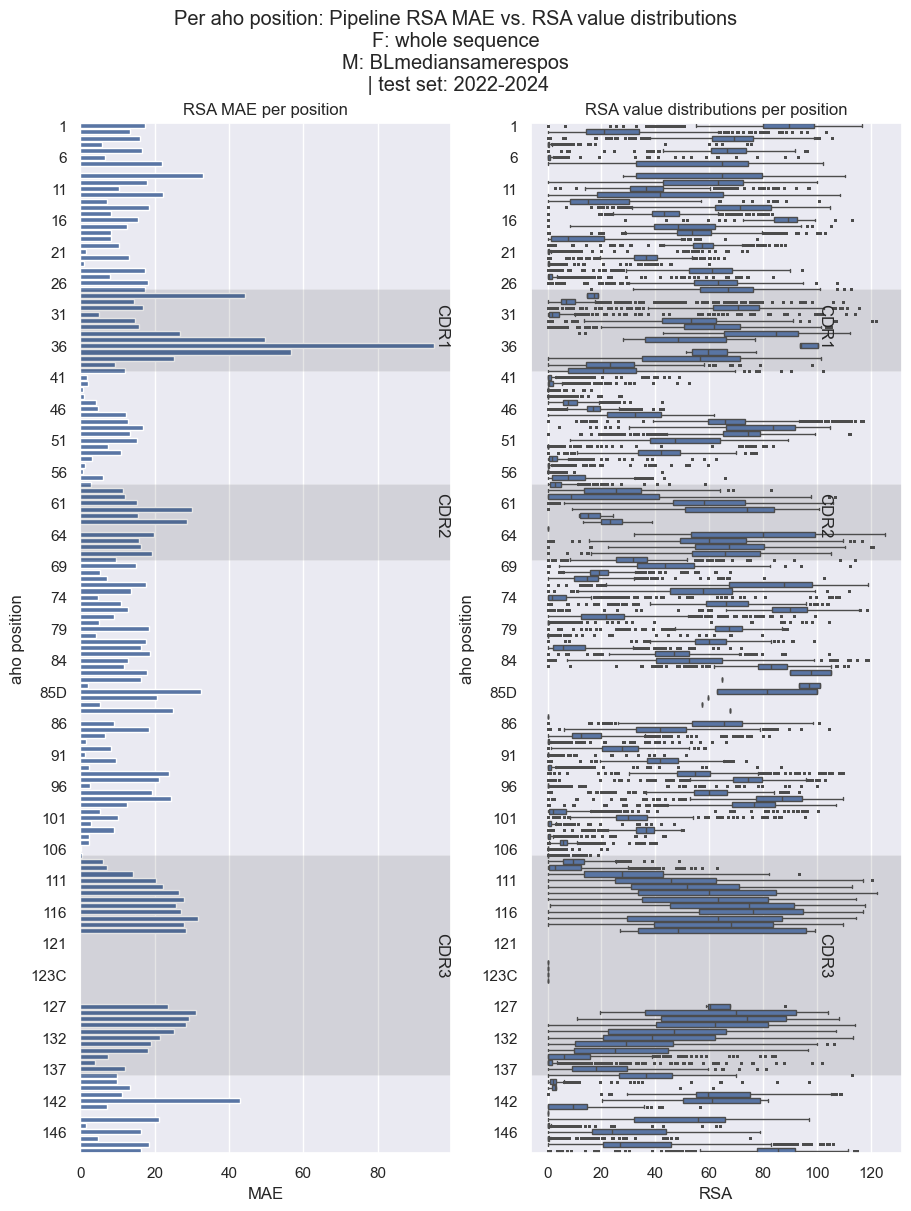

saving to: ../../data/png/test_new_234/loss_position_lco_whole_sequence_all_H_RANDOM_boxplot_all_H.png


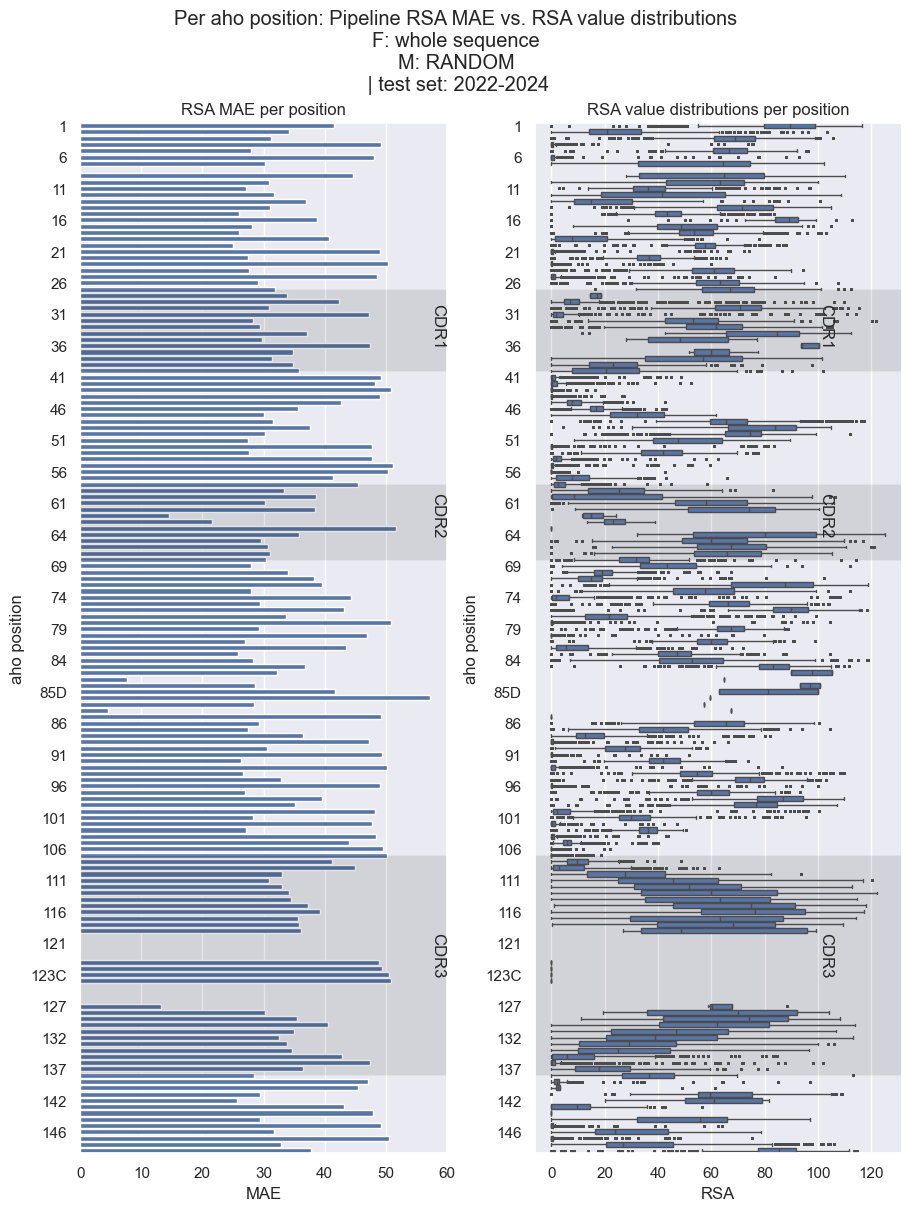

saving to: ../../data/png/test_new_234/loss_position_whole_sequence_all_H_IB_boxplot_all_H.png


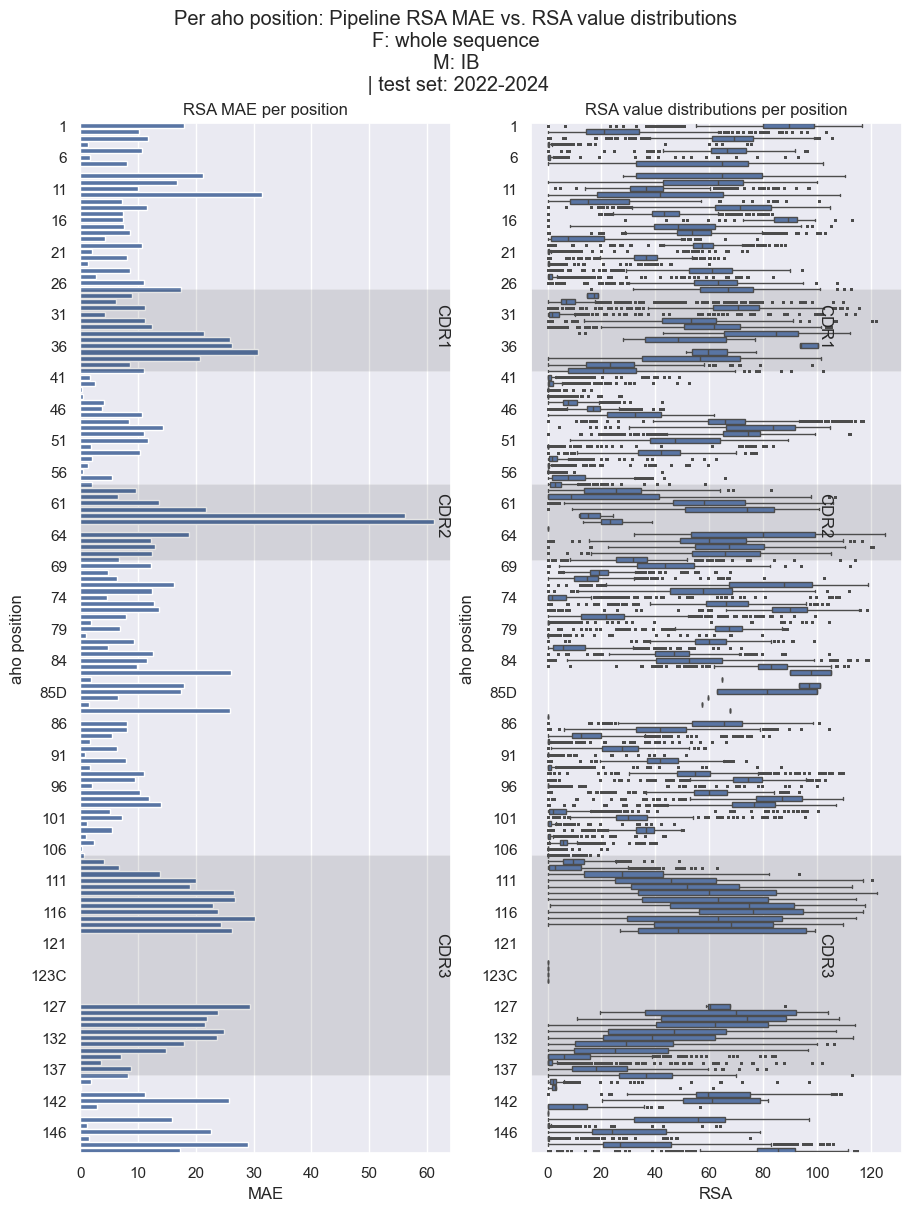

In [1166]:
test_set_string = '2022-2024'
for pipeline in tqdm(loss_per_position_df['pipeline'].unique()):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, 
                                   figsize=(9, 12),
                                   constrained_layout=True)
    loss_df = loss_per_position_df[ loss_per_position_df['pipeline'] == pipeline ]
    ylabel = f'ANARCI position (scheme: {p.FINAL_NUMBERING_SCHEME})'
    fig.suptitle(f'Per {p.FINAL_NUMBERING_SCHEME} position: Pipeline RSA MAE vs. RSA value distributions\n{extract_from_pipeline(pipeline)} | test set: {test_set_string}')
    
    # LEFT PLOT ------------------------------------------------------
    plot = sns.barplot(data=loss_df, 
                       y=loss_df['position'], 
                       x='abs_error',
                       ax=ax1, order=Y.columns)
    ax1.margins(y=0)
    _=u.annotate_plot(plot, x_rotation = 0, 
                      title='RSA MAE per position', 
                      xlabel='MAE', 
                      ylabel=f'{p.FINAL_NUMBERING_SCHEME} position', 
                      clean_ax_settings=dict(ax='y', nth_label_only=5))
    max_loss = loss_df['abs_error'].max()
    u.show_cdr_regions(list(Y.columns), ax1, CHAINS, 
                       p.FINAL_NUMBERING_SCHEME, max_loss, position_ax='y')
    
    # RIGHT PLOT ------------------------------------------------------
    plot2 =sns.boxplot(data=sasa_df, x='sasa', y='position', ax=ax2, order=Y.columns,
                       flierprops = dict(markerfacecolor = '0.50', markersize = 1))
    ax2.margins(y=0)
    _=u.annotate_plot(plot2, x_rotation = 0, 
                      title='RSA value distributions per position',
                      xlabel='RSA',
                      ylabel=f'{p.FINAL_NUMBERING_SCHEME} position', 
                      clean_ax_settings=dict(ax='y', nth_label_only=5))
    u.show_cdr_regions(list(Y.columns), ax2, CHAINS, 
                       p.FINAL_NUMBERING_SCHEME, cdr_label_coord=100, position_ax='y')
    plot_path = f'{TEST_PNG_DIR_PATH}/loss_position_{pipeline}_boxplot_{EXPERIMENT_SETTINGS}.png'
    fig.savefig(plot_path)
    print('saving to:', plot_path)
    plt.show()


In [25]:
sns.set(rc={'figure.figsize':(12, 8)})

In [158]:
loss_per_position_df['pipeline'].unique()

array(['lco_cont_window_r2_all_H_randomForestN5',
       'lco_cont_window_r4_all_H_randomForestN5',
       'lco_whole_sequence_all_H_BLavgpos',
       'lco_whole_sequence_all_H_BLknnwholeseqn10',
       'lco_whole_sequence_all_H_BLknnwholeseqn3',
       'lco_whole_sequence_all_H_BLmeansamerespos',
       'lco_whole_sequence_all_H_BLmediansamerespos',
       'lco_whole_sequence_all_H_RANDOM', 'whole_sequence_all_H_IB'],
      dtype=object)

In [151]:
np.nan in loss_per_position_df['position'].unique()

False

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/247677060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')


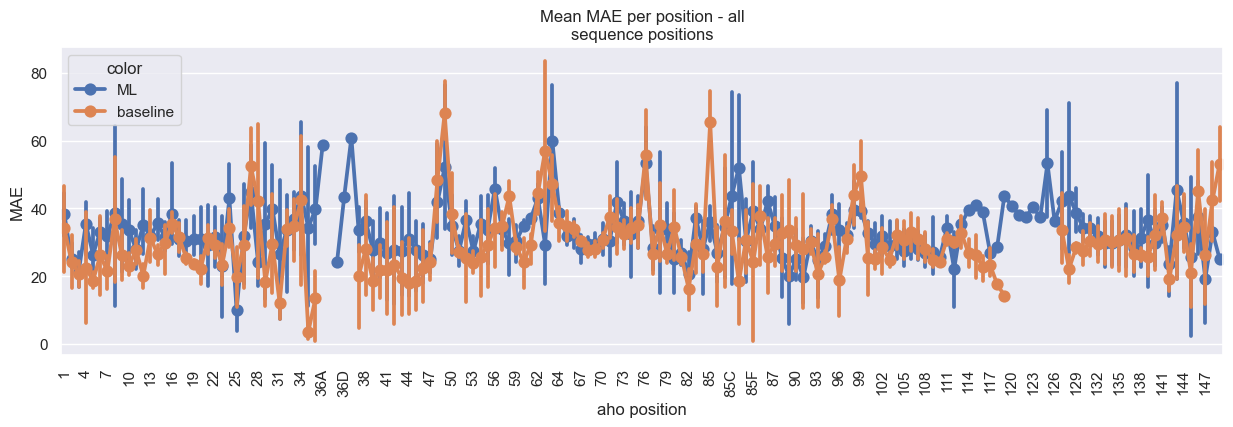

In [166]:
def mae_per_position_plot():
    # line plot v cdr3, kazdy model ma svoju ciaru ako odchylku 
    loss_per_position_df['pipeline'].unique()
    pipelines = ['lco_cont_window_r1_all_H_randomForestN30', 'lco_whole_sequence_all_H_BLavgpos'] 
    #start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
    #cols = list(Y.columns)[start:end]
    cols = list(Y.columns)
    data = loss_per_position_df[loss_per_position_df['position'].isin(cols)]
    data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
    positions_in_order = sorted(list(data['position'].unique()), key=u.anarci_column_sorter)
    plot = sns.pointplot(data=data, x='position', y='abs_error', hue='color', order=positions_in_order)
    u.show_only_nth_ticklabel(plot, n=3)
    _=u.annotate_plot(plot, x_rotation = 90, 
                      title=u.wrap(f'Mean MAE per position - all sequence positions'), 
                      xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                      ylabel='MAE')

mae_per_position_plot()

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/1557128736.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')


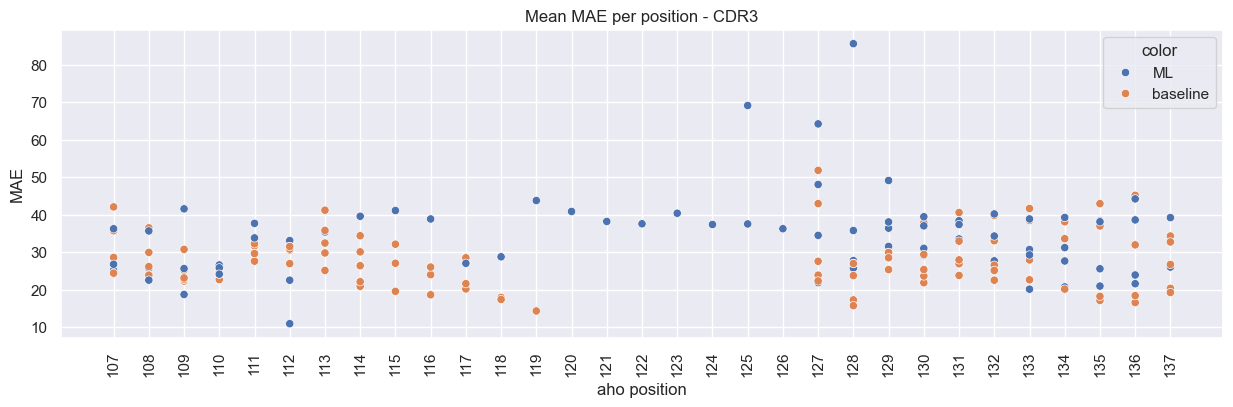

In [165]:
# line plot v cdr3, kazdy model ma svoju ciaru ako odchylku 
loss_per_position_df['pipeline'].unique()
pipelines = ['lco_cont_window_r1_all_H_randomForestN30', 'lco_whole_sequence_all_H_BLavgpos'] 
#A 
#loss_per_position_df
start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
cols = list(Y.columns)[start:end]
data = loss_per_position_df[loss_per_position_df['position'].isin(cols)]
data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
plot = sns.scatterplot(data=data, x='position', y='abs_error', hue='color')
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position - CDR3 region'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE')

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/2414327700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')


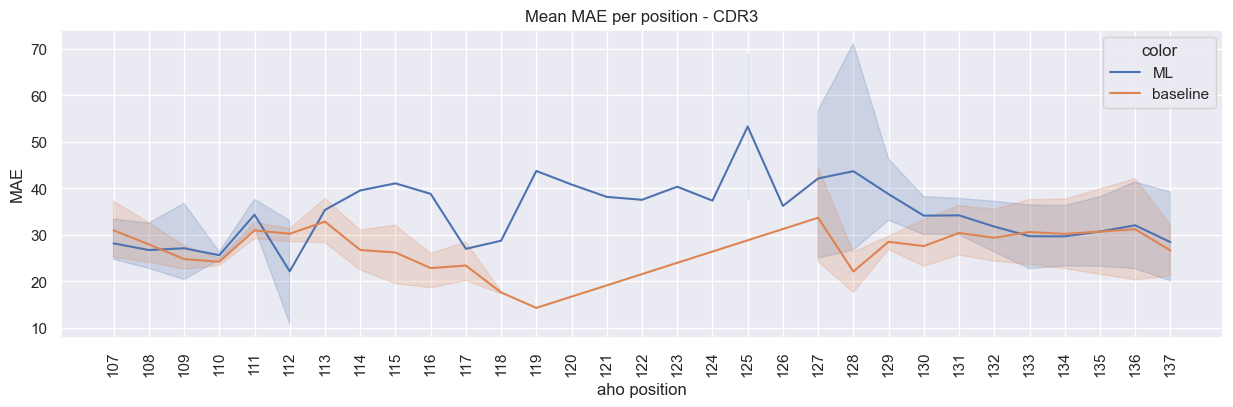

In [167]:
# line plot v cdr3, kazdy model ma svoju ciaru ako odchylku 
loss_per_position_df['pipeline'].unique()
pipelines = ['lco_cont_window_r1_all_H_randomForestN30', 'lco_whole_sequence_all_H_BLavgpos'] 
#A 
#loss_per_position_df
start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
cols = list(Y.columns)[start:end]
data = loss_per_position_df[loss_per_position_df['position'].isin(cols)]
data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
plot = sns.lineplot(data=data, x='position', y='abs_error', hue='color')
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position - CDR3'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE')

In [155]:
data['pipeline'].unique()

array(['lco_cont_window_r2_all_H_randomForestN5',
       'lco_cont_window_r4_all_H_randomForestN5',
       'lco_whole_sequence_all_H_BLavgpos',
       'lco_whole_sequence_all_H_BLknnwholeseqn10',
       'lco_whole_sequence_all_H_BLknnwholeseqn3',
       'lco_whole_sequence_all_H_BLmeansamerespos',
       'lco_whole_sequence_all_H_BLmediansamerespos',
       'lco_whole_sequence_all_H_RANDOM', 'whole_sequence_all_H_IB'],
      dtype=object)

In [160]:
#pipelines = list(loss_per_position_df['pipeline'].unique())[:-1]
pipelines = list(loss_per_position_df['pipeline'].unique())
#pipelines = loss_per_position_df['pipeline'].unique()
pipelines

['lco_cont_window_r2_all_H_randomForestN5',
 'lco_cont_window_r4_all_H_randomForestN5',
 'lco_whole_sequence_all_H_BLavgpos',
 'lco_whole_sequence_all_H_BLknnwholeseqn10',
 'lco_whole_sequence_all_H_BLknnwholeseqn3',
 'lco_whole_sequence_all_H_BLmeansamerespos',
 'lco_whole_sequence_all_H_BLmediansamerespos',
 'lco_whole_sequence_all_H_RANDOM',
 'whole_sequence_all_H_IB']

start: 119, end: 150
cols: ['107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137']
1


/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/4139876604.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/4139876604.py:16: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  plot = sns.lineplot(data=data, x='position', y='abs_error', hue='scenario',


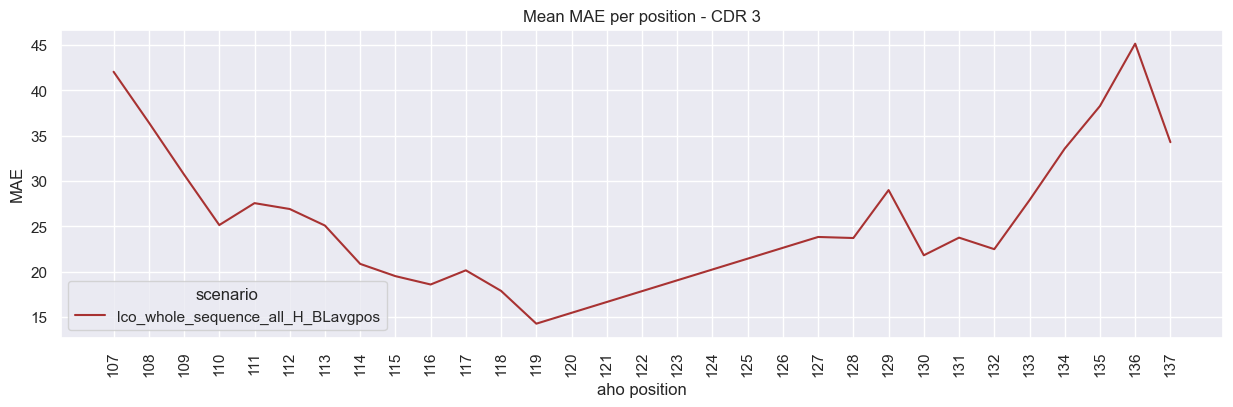

In [168]:
#pipelines = ['lco_cont_window_r1_all_H_randomForestN30',
#       'lco_cont_window_r2_all_H_randomForestN30',
#       'lco_cont_window_r3_all_H_randomForestN30',
#       'lco_cont_window_r3_all_H_randomForestN5',
#       'lco_cont_window_r4_all_H_randomForestN30',
#       'lco_whole_sequence_all_H_BLmediansamerespos']


start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
print(f"start: {start}, end: {end}")
cols = list(Y.columns)[start:end]
print(f"cols: {cols}")
data = loss_per_position_df[(loss_per_position_df['position'].isin(cols)) & (loss_per_position_df['pipeline'].isin(pipelines))]
data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
print(data['pipeline'].nunique())
plot = sns.lineplot(data=data, x='position', y='abs_error', hue='pipeline',
                   palette=['#a83232', '#a84232', '#a84232', '#a88b32', '#a88b32', 
                            '#66FFFF', '#00CCFF', '#0099FF', '#3399FF', '#006699'])
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position - CDR 3'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE')
#u.show_cdr_regions(cols, plot, CHAINS, 
#                    p.FINAL_NUMBERING_SCHEME, cdr_label_coord=data['abs_error'].max(), 
#                   position_ax='x', text_offsets = [3, 2, 14])
plot.figure.savefig(f'{TEST_PNG_DIR_PATH}/mae_per_position_all_line_{EXPERIMENT_SETTINGS}.png')

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/513993144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/513993144.py:11: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  plot = sns.scatterplot(data=data, x='position', y='abs_error', hue='scenario',


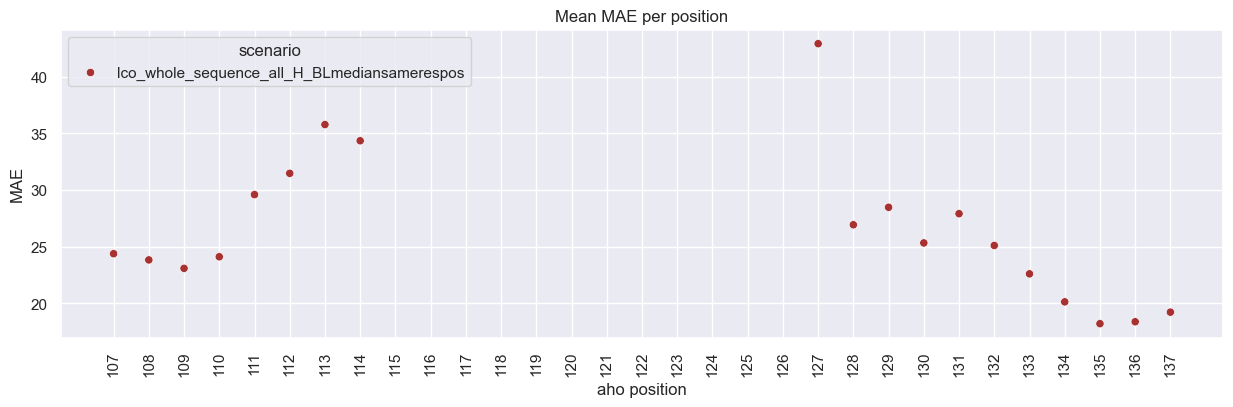

In [162]:
pipelines = ['lco_cont_window_r1_all_H_randomForestN30',
       'lco_cont_window_r2_all_H_randomForestN30',
       'lco_cont_window_r3_all_H_randomForestN30',
       'lco_cont_window_r3_all_H_randomForestN5',
       'lco_cont_window_r4_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLmediansamerespos']
start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
cols = list(Y.columns)[start:end]
data = loss_per_position_df[(loss_per_position_df['position'].isin(cols)) & (loss_per_position_df['pipeline'].isin(pipelines))]
data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
plot = sns.scatterplot(data=data, x='position', y='abs_error', hue='pipeline',
                   palette=['#a83232', '#a84232', '#a84232', '#a88b32', '#a88b32', 
                            '#324ca8'])
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE')

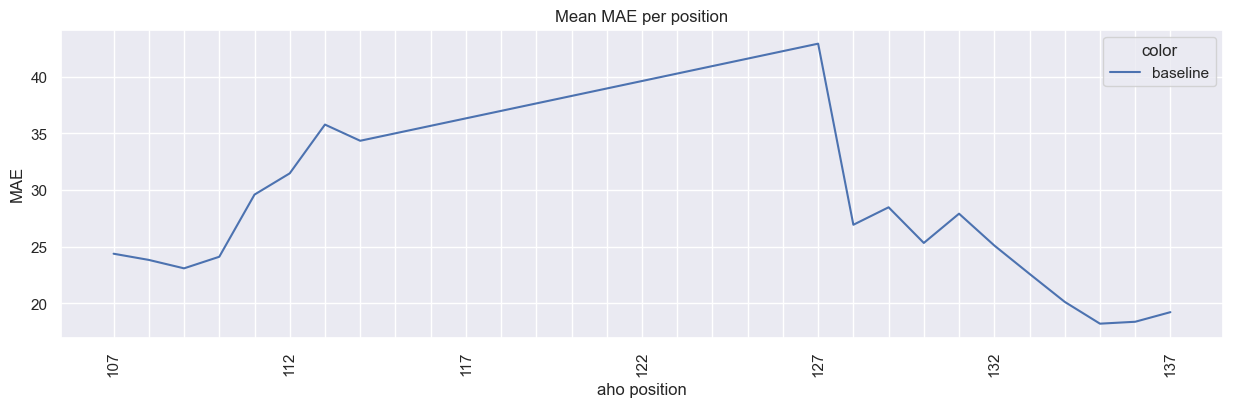

In [163]:
plot = sns.lineplot(data=data, x='position', y='abs_error', hue='color', sort=False)
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE',
                  clean_ax_settings=dict(ax='x', nth_label_only=5))

/var/folders/7t/cn6n2t5s2_gflwnwbmbbmpwc0000gn/T/ipykernel_55834/879151085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'statistical' if 'BL' in s else 'ML')


NameError: name 'cols' is not defined

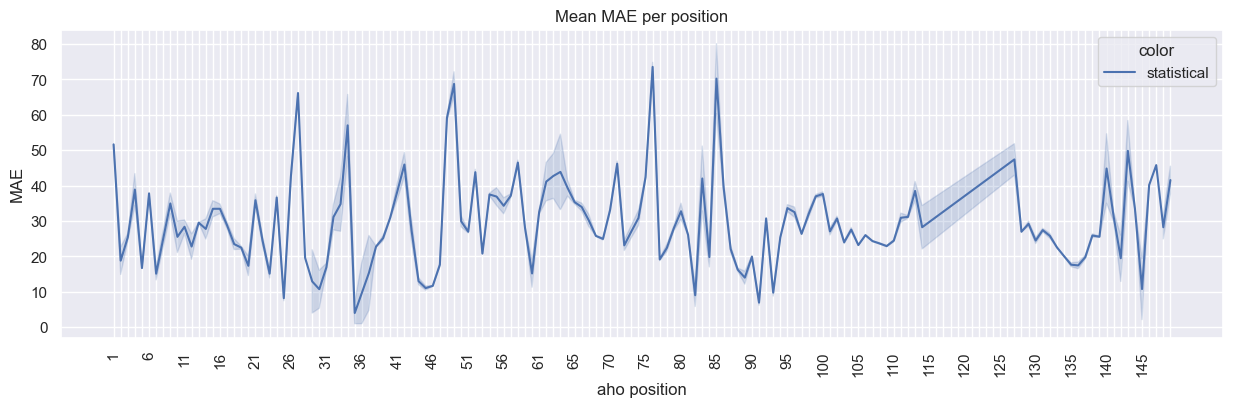

In [164]:
pipelines = [
       'lco_cont_window_r4_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLmeansamerespos',
       'lco_whole_sequence_all_H_BLmediansamerespos']
cols = list(Y.columns)
cols = [c for c in cols if not c.startswith('85') or len(c) <= 2]
data = loss_per_position_df[(loss_per_position_df['pipeline'].isin(pipelines)) & (loss_per_position_df['position'].isin(cols))]
data['color'] = data['pipeline'].apply(lambda s: 'statistical' if 'BL' in s else 'ML')
data = data.sort_values(by='position', key=lambda s: s.apply(u.anarci_column_sorter))
plot = sns.lineplot(data=data, x='position', y='abs_error', hue='color', sort=False)
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE',
                  clean_ax_settings=dict(ax='x', nth_label_only=5))
u.show_cdr_regions(cols, plot, CHAINS, 
                    p.FINAL_NUMBERING_SCHEME, cdr_label_coord=data['abs_error'].max(), 
                   position_ax='x', text_offsets = [3, 2, 14])
plot.figure.savefig(f'{TEST_PNG_DIR_PATH}/mae_per_position_MLbest_v_Sbest_line_{EXPERIMENT_SETTINGS}.png')

In [72]:
pipelines = loss_per_position_df['pipeline'].unique()
pipelines = [
    'lco_whole_sequence_all_H_BLmediansamerespos',
    'lco_whole_sequence_all_H_BLavgpos',
    'lco_whole_sequence_all_H_BLknnwholeseqn3'
]   
pipelines

['lco_whole_sequence_all_H_BLmediansamerespos',
 'lco_whole_sequence_all_H_BLavgpos',
 'lco_whole_sequence_all_H_BLknnwholeseqn3']

3


/var/tmp/pbs.1836808.ktchpcps002/ipykernel_31818/619084309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'statistical' if 'BL' in s else 'ML')


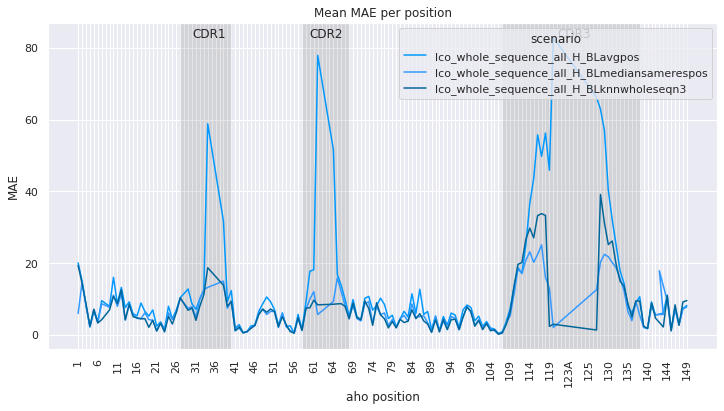

In [74]:
#pipelines = loss_per_position_df['pipeline'].unique()
#pipelines = list(loss_per_position_df['pipeline'].unique())[:-1]
print(len(pipelines))
cols = list(Y.columns)
cols = [c for c in cols if not c.startswith('85') or len(c) <= 2]
data = loss_per_position_df[(loss_per_position_df['pipeline'].isin(pipelines)) & (loss_per_position_df['position'].isin(cols))]
data['color'] = data['pipeline'].apply(lambda s: 'statistical' if 'BL' in s else 'ML')
data = data.sort_values(by='position', key=lambda s: s.apply(u.anarci_column_sorter))
plot = sns.lineplot(data=data, x='position', y='abs_error', hue='pipeline', sort=False,
                   #palette=['#a83232', '#a84232', '#a84232', '#a88b32', '#a88b32', 
                   #         '#66FFFF', '#00CCFF', '#0099FF', '#3399FF', '#006699'])
                   palette=['#0099FF', '#3399FF', '#006699'])
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE',
                  clean_ax_settings=dict(ax='x', nth_label_only=5))
u.show_cdr_regions(cols, plot, CHAINS, 
                    p.FINAL_NUMBERING_SCHEME, cdr_label_coord=data['abs_error'].max(), 
                   position_ax='x', text_offsets = [3, 2, 14])
plot.figure.savefig(f'{TEST_PNG_DIR_PATH}/mae_per_position_all_line_{EXPERIMENT_SETTINGS}.png')

/var/tmp/pbs.1836808.ktchpcps002/ipykernel_31818/821279713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['scenario'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')


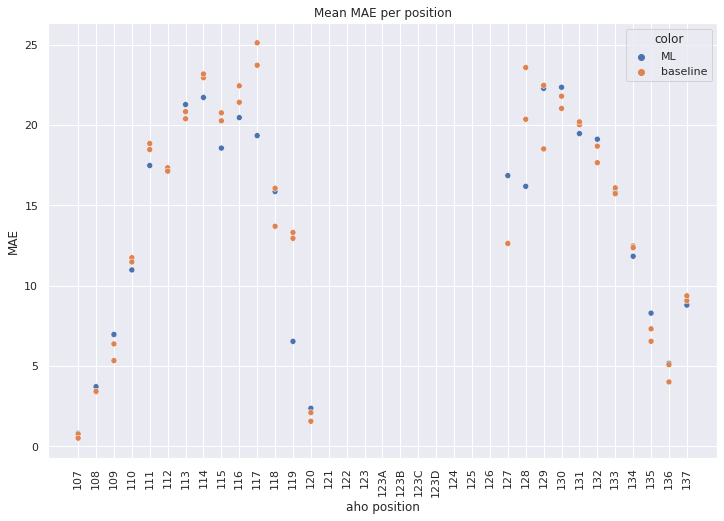

In [36]:
pipelines = [
       'lco_cont_window_r4_all_H_randomForestN30',
       'lco_whole_sequence_all_H_BLmeansamerespos',
       'lco_whole_sequence_all_H_BLmediansamerespos']
start, end = list(Y.columns).index('107'), list(Y.columns).index('138')
cols = list(Y.columns)[start:end]
data = loss_per_position_df[(loss_per_position_df['position'].isin(cols)) & (loss_per_position_df['pipeline'].isin(pipelines))]
data['color'] = data['pipeline'].apply(lambda s: 'baseline' if 'BL' in s else 'ML')
plot = sns.scatterplot(data=data, x='position', y='abs_error', hue='color')
_=u.annotate_plot(plot, x_rotation = 90, 
                  title=u.wrap(f'Mean MAE per position'), 
                  xlabel=f'{p.FINAL_NUMBERING_SCHEME} position',
                  ylabel='MAE')

---

**Do UMAP on 160D space (each position - one coordinate)**

---

**Generate summary deviations per ANARCI position:**

In [37]:
pos_df = results_df.groupby('position')['abs_error'].mean().to_frame()
pos_df = pos_df.sort_values(by='position', key=lambda s: s.apply(u.anarci_column_sorter))
pos_df.head(n=3)

abs_error
position           
1         14.130085
2         14.124573
3          9.699147

**Show histogram of per-position-deviations:**

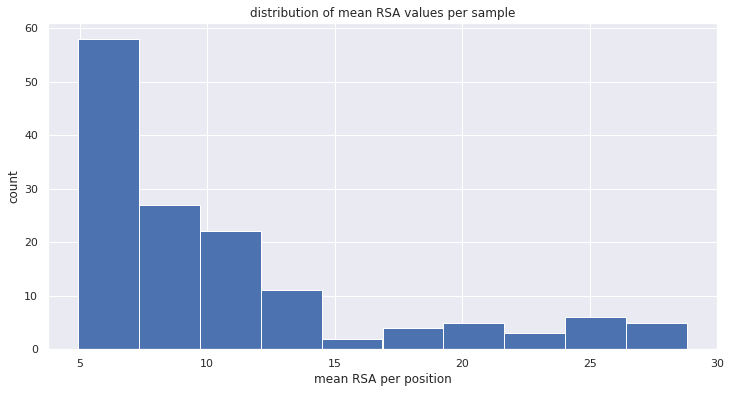

In [38]:
sns.set(rc={'figure.figsize':(12, 6)})
plot = pos_df.plot.hist(legend=False)
_=u.annotate_plot(plot, x_rotation = 0,
                  ylabel='count',
                  xlabel='mean RSA per position',
                  title='distribution of mean RSA values per sample')
plot.figure.savefig(f'{TEST_PNG_DIR_PATH}/loss_position_scenario_histogram_{EXPERIMENT_SETTINGS}.png')
                

**Which positions are generally hard to predict and which ones easy?**

In [39]:
HARD_TO_PREDICT_PERC_BOTTOM_THRESHOLD = 20
EASY_TO_PREDICT_PERC_TOP_THRESHOLD = 3

In [40]:
hard_positions = list(pos_df[pos_df['abs_error'] > HARD_TO_PREDICT_PERC_BOTTOM_THRESHOLD].index)
print(hard_positions)

['34', '85B', '85A', '85E', '85D', '85C', '113', '114', '115', '116', '117', '118', '127', '128', '129', '130', '131', '132']


In [41]:
easy_positions = list(pos_df[pos_df['abs_error'] < EASY_TO_PREDICT_PERC_TOP_THRESHOLD].index)
print(easy_positions)

[]


In [42]:
# vybrat par struktur
# naozaj maju chybu na tazkych poziciach?

---

## Catastrophic predictions

In [ ]:
start, end = list(Y.columns).index('107'), list(Y.columns).index('138'); cols = list(Y.columns)[start:end]
data_cdr3 = results_df[results_df['position'].isin(cols)].copy()
data_cdr3

In [ ]:
def get_df(data): 
    data['buried'] = data['sasa'] <= LOW
    data['exposed'] = data['sasa'] >= HIGH
    data['overpred'] = (data['buried'] == True) & (data['prediction'] >= HIGH)
    data['underpred'] = (data['exposed'] == True) & (data['prediction'] <= LOW)
    return pd.concat([        
        data.groupby('pipeline')['underpred'].sum().to_frame(),
        data.groupby('pipeline')['overpred'].sum().to_frame(),
    ], axis=1)

c_data, c_data_cdr3 = get_df(results_df), get_df(data_cdr3)
c_data_cdr3

In [ ]:
l = pd.merge(left_index=True, right_index=True, left=c_data, right=c_data_cdr3, suffixes=('_all', '_cdr3'))
l['underpred_cdr3_perc'] = l['underpred_cdr3'] / l['underpred_all'] * 100
l['overpred_cdr3_perc'] = l['overpred_cdr3'] / l['overpred_all'] * 100
l = l.reindex(columns = ['underpred_cdr3', 'underpred_all', 'underpred_cdr3_perc', 'overpred_cdr3', 'overpred_all', 'overpred_cdr3_perc'])
sns.scatterplot(data=l, x='underpred_cdr3_perc', y='overpred_cdr3_perc', hue='pipeline', 
                palette=['#CC0000', '#FF0000', '#FF6633', '#FF9900', '#FFCC00', 
                            '#000099', '#0099CC', '#3399FF', '#66CCFF', '#33FFFF'], s=400)

In [ ]:
start, end = list(Y.columns).index('107'), list(Y.columns).index('138'); cols = list(Y.columns)[start:end]
#cols = Y.columns
data = results_df[results_df['position'].isin(cols)].copy()
print(cols)



In [ ]:
buried = data.groupby('pipeline')['buried'].sum()
exposed = data.groupby('pipeline')['exposed'].sum()
s = pipeline_means.copy();  s.index = s['features'] + '_' + s['model']
s['buried'] = data.groupby('pipeline')['buried'].sum()
s['overpredictions'] = data.groupby('pipeline')['overpred'].sum()
s['overpredictions %'] = s['overpredictions'] / s['buried']
s['exposed'] = data.groupby('pipeline')['exposed'].sum()
s['underpredictions'] = data.groupby('pipeline')['underpred'].sum()
s['underpredictions %'] = s['underpredictions'] / s['exposed']
s.index = range(1, len(s) + 1)
s

In [ ]:
s2 = s.copy(); s2['pipeline'] = s2['features'] + '_' + s2['model']
plot = sns.scatterplot(data=s2, x='underpredictions %', y='overpredictions %', hue='pipeline', s=400,
               palette=['#CC0000', '#FF0000', '#FF6633', '#FF9900', '#FFCC00', 
                            '#000099', '#0099CC', '#3399FF', '#66CCFF', '#33FFFF'])
plot.set_title(f'Percentage of catastrophic predictions per pipeline')
plot.figure.savefig(f'{p.DATA_DIR}/png/{TEST_SET}/catastrophes_per_scenario_scatter_{EXP_STRING}.png')

---

## 3D comparison

**Load the data:**

In [ ]:
data = pd.read_csv(f'{p.DATA_DIR}/csv/{TEST_SET}/results_{EXPERIMENT_SETTINGS}.csv', index_col=0)
data['buried'] = data['sasa'] <= LOW
data['exposed'] = data['sasa'] >= HIGH
data['overpred'] = (data['buried'] == True) & (data['prediction'] >= HIGH)
data['underpred'] = (data['exposed'] == True) & (data['prediction'] <= LOW)
data.head(n=6)

In [ ]:
data['abs_error'].mean()

**Sequence we want to visualize should contain a lot of overpredictions
and underpredictions. Which one it is:**

In [ ]:
so = data.groupby(['sequence_id', 'pipeline'])['overpred'].sum().to_frame()
su = data.groupby(['sequence_id', 'pipeline'])['underpred'].sum().to_frame()
sosu = pd.merge(left=so, right=su, left_index=True, right_index=True)
sosu['all'] = sosu['overpred'] + sosu['underpred']
sosu = sosu.sort_values(by='all', ascending=False).reset_index()
sosu.head(n=1)

In [ ]:
! pip install py3Dmol

In [ ]:
COLOR_MAP = { 0: 'blue', 
              1: 'white', 
              2: 'pink', 
              3: 'red', 
              4: 'red'
}

In [ ]:
import io
import numpy as np
import pandas as pd
import py3Dmol

from Bio import PDB

def show_pdb(pdb, 
             show_sidechains = True, 
             color_map = COLOR_MAP):
    
    view = py3Dmol.view(width=800, height=600, js='https://cdnjs.cloudflare.com/ajax/libs/3Dmol/1.8.0/3Dmol.js')
    view.addModelsAsFrames(pdb)
    style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
    if show_sidechains:
        style['stick'] = {'colorscheme': {'prop': 'b', 'map': color_map}}
    view.addSurface(py3Dmol.SAS, {'opacity': 0.4, 'color': 'grey'})
    view.setStyle({'model': -1}, style)
    return view.zoomTo()

atom_types = [
    'N', 'CA', 'C', 'CB', 'O', 'CG', 'CG1', 'CG2', 'OG', 'OG1', 'SG', 'CD',
    'CD1', 'CD2', 'ND1', 'ND2', 'OD1', 'OD2', 'SD', 'CE', 'CE1', 'CE2', 'CE3',
    'NE', 'NE1', 'NE2', 'OE1', 'OE2', 'CH2', 'NH1', 'NH2', 'OH', 'CZ', 'CZ2',
    'CZ3', 'NZ', 'OXT'
]
atom_order = {atom_type: i for i, atom_type in enumerate(atom_types)}
atom_type_num = len(atom_types)  # := 37.

def overwrite_b_factors(pdb_str: str, chain_id: str, residue_data, vmin, vmax) -> str:
    """Overwrites the B-factors in pdb_str with contents of bfactors array.
    Args:
    pdb_str: An input PDB string.
    residue_data: A numpy array with shape [n_residues]
    vmin: Minimum value in residue_data used for normalization
    vmax: Maximum value in residue_data used for normalization
    Returns:
    A new PDB string with the B-factors replaced.
    """
    bands = ((np.clip(residue_data, vmin, vmax) - vmin) / vmax * 100) // 20
    bfactors = np.repeat(bands[:, np.newaxis], atom_type_num, axis=1)
    
    if bfactors.shape[-1] != atom_type_num:
        raise ValueError(f'Invalid final dimension size for bfactors: {bfactors.shape[-1]}.')

    parser = PDB.PDBParser(QUIET=True)
    handle = io.StringIO(pdb_str)
    structure = parser.get_structure('', handle)

    curr_resid = ('', '', '')
    idx = -1
    for atom in structure.get_atoms():
        #print(str(atom))
        if atom.get_full_id()[2] != chain_id:
            continue
        atom_resid = atom.parent.get_id()
        if atom_resid != curr_resid:
            idx += 1
            if idx >= bfactors.shape[0]:
                raise ValueError(f'Index into bfactors exceeds number of residues. B-factors shape: {bfactors.shape}, idx: {idx}.')
        curr_resid = atom_resid
        atom.bfactor = bfactors[idx, atom_order['CA']]

    new_pdb = io.StringIO()
    pdb_io = PDB.PDBIO()
    pdb_io.set_structure(structure)
    pdb_io.save(new_pdb)
    return new_pdb.getvalue()

In [ ]:
SEQUENCE_ID = '7N8I:H'
s = pd.read_csv(f'{p.DATA_DIR}/csv/sasa_aligned/sasa_{SEQUENCE_ID[-1]}.csv', index_col=0)
with open(f'{p.DATA_DIR}/pdb/incremental/{SEQUENCE_ID[:4].lower()}.pdb') as f: pdb_raw = f.read()

In [ ]:
s

In [ ]:
def cdrnumber(i):
    ii = int(i[:-1]) if not i[-1].isnumeric() else int(i)
    if 27 <= ii <= 40:
        return 20
    elif 58 <= ii <= 68:
        return 40
    elif 107 <= ii <= 138:
        return 60
    return 0
color_map = {
    0: 'white',
    1: 'red',
    2: 'blue',
    3: 'green'
}
sasa_default = s.loc[SEQUENCE_ID].transpose().dropna().to_frame()
sasa_default['index'] = sasa_default.index
sasa_default['cdr'] = sasa_default['index'].apply(cdrnumber)
#sasa_default.index = range(1, len(sasa_default)+1)
sasa_default.drop(columns=['index', '7N8I:H'], inplace=True)
sasa_default.columns = ['7N8I:H']
#list(sasa_default['cdr'])
sasa_default = sasa_default['7N8I:H']
#sasa_default['index'].map(cdrnumber).sum()
sasa_default

In [ ]:
color_map = { 0: 'blue', 
              1: 'white', 
              2: 'pink', 
              3: 'red', 
              4: 'red'
}
sasa_default = s.loc[SEQUENCE_ID].transpose().dropna(); #sasa_default.index = range(1, len(sasa_default) + 1); 
sasa_default

In [ ]:
pdb_sasa_default = overwrite_b_factors(pdb_raw, SEQUENCE_ID[-1], sasa_default, vmin=0, vmax=100)
pdb_sasa_default = '\n'.join([line for line in pdb_sasa_default.split('\n') if len(line) < 22 or line[21] == 'H'])
view = show_pdb(pdb_sasa_default, color_map=color_map)
view.zoom(1); view.rotate(-40)

In [ ]:
sasa_default

In [ ]:
sasa_predicted = data[ (data['pipeline'] == 'lco_cont_window_r4_all_H_randomForestN30') & (data['sequence_id'] == SEQUENCE_ID) ][['position', 'prediction']].drop(columns='position').dropna()
sasa_predicted.index = range(1, len(sasa_predicted) + 1)
sasa_predicted = sasa_predicted['prediction']
pdb_sasa_predicted = overwrite_b_factors(pdb_raw, SEQUENCE_ID[-1], sasa_predicted, vmin=0, vmax=100)
pdb_sasa_predicted = '\n'.join([line for line in pdb_sasa_predicted.split('\n') if len(line) < 22 or line[21] == 'H'])
view = show_pdb(pdb_sasa_predicted)
view.zoom(1); view.rotate(-40)

In [ ]:
data[ (data['pipeline'] == 'lco_cont_window_r4_all_H_randomForestN30') & (data['sequence_id'] == SEQUENCE_ID) ]['underpred'].sum()

In [ ]:
CHAIN_ID = '7N8I:H'
#s = pd.read_csv(f'{p.DATA_DIR}/csv/sasa_relative_unaligned/sasa_all.csv', index_col=0)
s = pd.read_csv(f'{p.DATA_DIR}/csv/sasa_aligned/sasa_H.csv', index_col=0)
with open(f'{p.DATA_DIR}/pdb/incremental/{CHAIN_ID[:4].lower()}.pdb') as f: pdb_raw = f.read()
sasa_default = s.loc[CHAIN_ID].transpose().dropna(); sasa_default.index = range(1, len(sasa_default) + 1); sasa_default
pdb_sasa_default = overwrite_b_factors(pdb_raw, CHAIN_ID, sasa_default, vmin=0, vmax=1)
show_pdb(pdb_sasa_default)

---

In [ ]:
cata_per_pos_df = results_df.groupby('position').agg({'overpred': 'sum', 'underpred': 'sum'})
plot = cata_per_pos_df.plot.scatter(x='underpred', y='overpred')
_=u.annotate_plot(plot, x_rotation = 0, 
                      title=u.wrap(f'overpredictions vs. underpredictions, per position, summed for all pipelines {EXP_STRING}', n=60), 
                      xlabel=u.wrap('# of overpredictions in one ANARCI position, summed for all pipelines', n=40), 
                      ylabel=u.wrap('# of underpredictions in one ANARCI position, summed for all pipelines', n=40), 
                      )
plot.figure.savefig(f'{TEST_PNG_DIR_PATH}/catastrophes_by_position_{ALPHA}_{BETA}_scatter_{EXPERIMENT_SETTINGS}.png')

In [ ]:
cata_per_pos_df

NameError: name 'cata_per_pos_df' is not defined

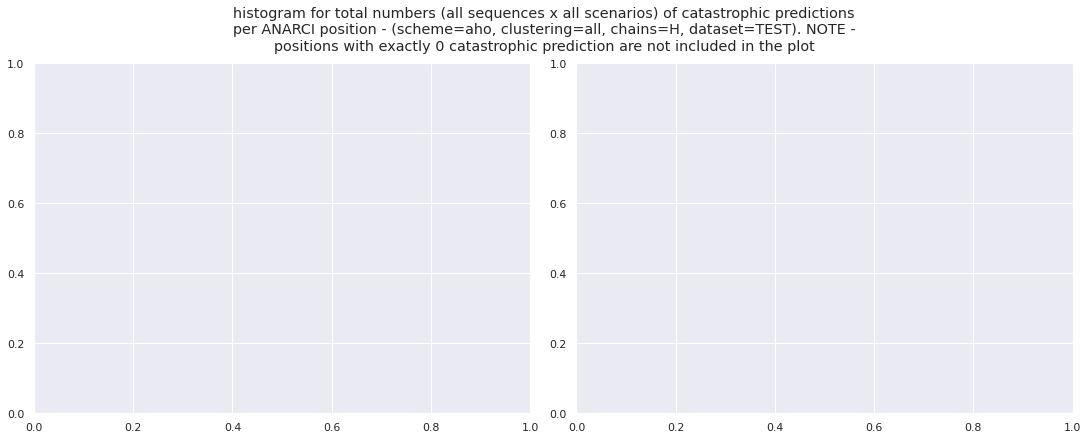

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15, 6),
                               constrained_layout=True)
fig.suptitle(u.wrap(f'histogram for total numbers (all sequences x all pipelines) of catastrophic predictions per ANARCI position - {EXP_STRING}. NOTE - positions with exactly 0 catastrophic prediction are not included in the plot ', 90))
cata_per_pos_df[ cata_per_pos_df['overpred'] > 1]['overpred'].plot.hist(bins=30, ax=ax1)
cata_per_pos_df[ cata_per_pos_df['underpred'] > 1]['underpred'].plot.hist(bins=30, ax=ax2)
_=u.annotate_plot(ax1, xlabel=u.wrap(f'overpredictions (realRSA <= {ALPHA}, predictedRSA >= {BETA}) count per ANARCI position (total summed)', 60))
_=u.annotate_plot(ax2, xlabel=u.wrap(f'underpredictions (realRSA >= {BETA}, predictedRSA <= {ALPHA}) count per ANARCI position (total summed)', 60))
fig.savefig(f'{TEST_PNG_DIR_PATH}/catastrophes_by_position_{ALPHA}_{BETA}_hist_{EXPERIMENT_SETTINGS}')

In [ ]:
results_df.groupby('position')['overpred'].sum() / results_df.groupby('position')['sequence_id'].count()

---

## Code dump

In [ ]:
#Y.std().sort_values().tail(50)

In [ ]:
#Y_melted.head(n=1)

In [ ]:
# jake konkretni pozice jsou lehke na predikci a jake tezke? 
# (zamer se na pozice, ktere se vyskytuji casto - ne ty na kterych jsou vetsinou gapy)

position_df = total_scenario_df.groupby('Id')['score'].mean().to_frame()
position_df.index = sorted(position_df.index, key=u.anarci_column_sorter)
position_df['count'] = Y_melted[ Y_melted['value'] != -1 ]['variable'].value_counts()

In [ ]:
print('before count filer shape:', position_df.shape)
COUNT_PERCENTUAL_THRESHOLD = 50
THRESHOLD = position_df['count'].max() * COUNT_PERCENTUAL_THRESHOLD = 50 / 100
position_df = position_df[ position_df['count'] >= position_df['count'].max() * COUNT_PERCENTUAL_THRESHOLD / 100]
print(f'after count filter (perc={COUNT_PERCENTUAL_THRESHOLD}) shape: {position_df.shape}')
position_df.head(n=3)

# vybrat par struktur
# naozaj maju chybu na tazkych poziciach?

In [ ]:
ax = sns.scatterplot(
    x=Y.replace(-1, np.nan).std().reindex(position_df.index),
    y=position_df['score'],
)    
ax.set_xlim(0, 61)
ax.set_ylim(0, 61)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 15))
plot = sns.barplot(data=position_df, y=position_df.index, x='score')
_=u.annotate_plot(plot, x_rotation = 0, 
                  title='Mean % absolute deviation per ANARCI position (ALL models, dataset: TEST)', 
                  xlabel='mean % absolute deviation', 
                  ylabel=f'ANARCI position (scheme: {p.FINAL_NUMBERING_SCHEME})', 
                  clean_ax_settings=dict(ax='y', nth_label_only=5))

In [ ]:
position_df['score'].plot.hist()

## Catastrophic predictions

## Per sample

In [ ]:
MODEL_NAME = 'BLavgpos'
FEATURES = 'lco_whole_sequence_all_H'
TEST_Y_RAW_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/raw_y/{FEATURES}_{MODEL_NAME}.csv'
TEST_Y_PREDS_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/raw_predictions/{FEATURES}_{MODEL_NAME}.csv'
TEST_STATS_BY_SAMPLE_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/scores_per_sample/{FEATURES}_{MODEL_NAME}.csv'

Y = pd.read_csv(TEST_Y_RAW_PATH, index_col=0)
preds = pd.read_csv(TEST_Y_PREDS_PATH, index_col=0)
by_sample = pd.read_csv(TEST_STATS_BY_SAMPLE_PATH, index_col=0)

# >=50 predicted <=10 reality (overpredict)
# <=10 predicted >=50 reality (underpredict)

def count_catastrophes(row):
    P = preds
    unds, ovs = 0, 0
    for col in Y.columns:
        if Y.loc[row.name, col] >= 50 and P.loc[row.name, col] <= 10:
            unds += 1
        if Y.loc[row.name, col] <= 10 and P.loc[row.name, col] >= 50:
            ovs += 1
    return unds, ovs
        
cc = Y.apply(count_catastrophes, axis=1)
unders, overs = [c[0] for c in cc], [c[1] for c in cc]
by_sample['underpreds'] = unders
by_sample['overpreds'] = overs
by_sample['misspreds'] = by_sample['underpreds'] + by_sample['overpreds']
by_sample.to_csv(TEST_STATS_BY_SAMPLE_PATH)


In [ ]:
by_sample = pd.read_csv(TEST_STATS_BY_SAMPLE_PATH, index_col=0)
by_sample

### Per ANARCI position

In [ ]:
MODEL_NAME = 'BLavgpos'
FEATURES = 'lco_whole_sequence_all_H'
TEST_Y_RAW_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/raw_y/{FEATURES}_{MODEL_NAME}.csv'
TEST_Y_PREDS_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/raw_predictions/{FEATURES}_{MODEL_NAME}.csv'
TEST_STATS_BY_SAMPLE_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/scores_per_position/{FEATURES}_{MODEL_NAME}.csv'

Y = pd.read_csv(TEST_Y_RAW_PATH, index_col=0)
preds = pd.read_csv(TEST_Y_PREDS_PATH, index_col=0)
by_pos = pd.read_csv(TEST_STATS_BY_SAMPLE_PATH, index_col=0)

# >=50 predicted <=10 reality (overpredict)
# <=10 predicted >=50 reality (underpredict)

def count_catastrophes(col):
    P = preds
    unds, ovs = 0, 0
    for row in Y.index:
        if Y.loc[row, col.name] >= 50 and P.loc[row, col.name] <= 10:
            unds += 1
        if Y.loc[row, col.name] <= 10 and P.loc[row, col.name] >= 50:
            ovs += 1
    return unds, ovs
        
cc = Y.apply(count_catastrophes, axis=0).transpose().reset_index(drop=True)
by_pos['underpreds'] = cc[0]
by_pos['overpreds'] = cc[1]
by_pos.head(n=3)

copied from 03b: remove later

---

In [ ]:
TEST_SCORES_TOTAL_DIR_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/scores'
TEST_SCORES_PER_SAMPLE_DIR_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/scores_per_sample'
TEST_SCORES_PER_POSITION_DIR_PATH = f'{p.DATA_DIR}/csv/{TEST_SET}/scores_per_position'
command = f'mkdir -p {TEST_SCORES_TOTAL_DIR_PATH} {TEST_SCORES_PER_SAMPLE_DIR_PATH} {TEST_SCORES_PER_POSITION_DIR_PATH}'
print('command:', command)
! $command

## Total score

In [ ]:
score = u.avg_deviation(Y, predictions)
score

In [ ]:
with open(f'{TEST_SCORES_TOTAL_DIR_PATH}/{FEATURES}_{MODEL_NAME}.csv', 'w') as final_score_file:
    final_score_file.write(str(score))

---